![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [484]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [485]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [486]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [487]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [488]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [201]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [202]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [203]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [204]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [205]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [489]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [209]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
34411,id_1605,Vienna,NaN,1606.0,NaN,4.0,"[[], []]",/Restaurant_Review-g190454-d12826203-Reviews-R...,d12826203,1,4.5
37962,id_1646,Hamburg,['European'],1649.0,$$ - $$$,68.0,[['Excellent place to dine @ Courtyard Marrio....,/Restaurant_Review-g187331-d1039210-Reviews-Re...,d1039210,1,4.0
5266,id_5266,Barcelona,"['Mediterranean', 'French', 'International', '...",4527.0,$$ - $$$,32.0,"[['Brunch', 'Great value for money'], ['09/18/...",/Restaurant_Review-g187497-d7820887-Reviews-Pe...,d7820887,0,0.0
38376,id_6722,Madrid,NaN,6725.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187514-d10831005-Reviews-M...,d10831005,1,3.5
39541,id_533,Helsinki,NaN,534.0,NaN,5.0,"[['Viihtyisä paikka', 'Cozy little scandinavia...",/Restaurant_Review-g189934-d8479806-Reviews-Ka...,d8479806,1,5.0


In [210]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [490]:
# Сначала сделаем названия столбцов с маленькой буквы
data.columns = ['restaurant_id','city','cuisine_style','ranking','price_range','number_of_reviews','reviews','url','id','sample','rating']
        

In [263]:
data.isna()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url,id,sample,rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,True,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False


In [491]:
import collections

In [492]:
cols = ['restaurant_id','city','cuisine_style','ranking','price_range','number_of_reviews','reviews','url','id','sample','rating']
err = []
for col in cols:
    for el in data[col].isna():
        if str(el) == "True":
            err.append(col)
print(collections.Counter(err))

Counter({'price_range': 17361, 'cuisine_style': 11590, 'number_of_reviews': 3200, 'reviews': 2})


In [493]:
# сколько процентов данных пропущено
def procentage(data):
    for col in data.columns:
        missing = np.mean(data[col].isnull())
        print ('{} - {}%'.format(col, round(missing*100)))

In [494]:
procentage(data)

restaurant_id - 0.0%
city - 0.0%
cuisine_style - 23.0%
ranking - 0.0%
price_range - 35.0%
number_of_reviews - 6.0%
reviews - 0.0%
url - 0.0%
id - 0.0%
sample - 0.0%
rating - 0.0%


## **number_of_reviews**

In [495]:
# Для примера я возьму столбец Number of Reviews
data['num_of_rev_NAN'] = pd.isna(data['number_of_reviews']).astype('uint8') # запомнили пустые значения

In [218]:
data['num_of_rev_NAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: num_of_rev_NAN, Length: 50000, dtype: uint8

In [496]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
# Заполним средним по городу
city_mean = data.groupby(['city']).number_of_reviews.mean() # среднее кол-во отзывов на каждый город
data['number_of_reviews'] = data.apply(lambda x: city_mean[x['city']] if pd.isna(x['number_of_reviews']) else x['number_of_reviews'], axis=1)

In [271]:
data['number_of_reviews'].isna().sum()

0

## price_range

In [497]:
data['price_range_isNAN'] = pd.isna(data['price_range']).astype('uint8') # столбец для булевых значений


In [273]:
data['price_range_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    1
49998    0
49999    0
Name: price_range_isNAN, Length: 50000, dtype: uint8

In [498]:
# Поработаем над заменой значений Nan
data['price_range'].unique()


array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [ ]:
#Пустые значения - 0
#Наименьшее $ - 1
#Среднее $$ - $$$ - 1.5
#Наибольшее $$$$ - 2

In [114]:
data['price_range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

In [ ]:
# Видим, что значений $$ - $$$ больше всего --> пропуски можем заменить на 1.5

In [499]:
data['price_range'] = data['price_range'].apply(lambda x: 1.5 if x == '$$ - $$$' else 1 if x == '$'
    else 2 if x == '$$$$' else 1.5 if type(x) == float else x)

In [500]:
data['price_range'].isna().sum()

0

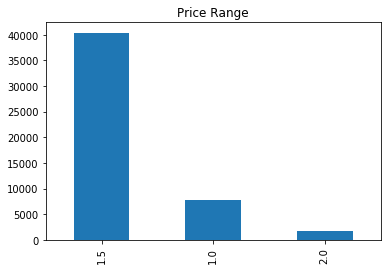

In [501]:
data['price_range'].value_counts().plot(kind='bar', title='Price Range')

## cuisine_style 

In [502]:
data['cuisine_isNAN'] = pd.isna(data['cuisine_style']).astype('uint8') # запомнили булевые значения

In [503]:
data['cuisine_style'].unique()

array(["['Bar', 'Pub']",
       "['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']",
       "['Vegetarian Friendly']", ...,
       "['Steakhouse', 'Barbecue', 'Australian', 'Argentinean', 'South American']",
       "['French', 'American', 'Cafe', 'Healthy', 'Soups']",
       "['French', 'Contemporary', 'Fusion', 'Gastropub']"], dtype=object)

In [280]:
data['cuisine_style'].isna().sum()

11590

In [504]:
# Так как пропусков очень много, добавим новое значение "Unknown"
data['cuisine_style'] = data['cuisine_style'].fillna("Unknown")

## reviews

In [ ]:
# Здесь только два пропуска, но тем не менее, стоит взглянуть

In [231]:
data.reviews.unique()

array(['[[], []]',
       "[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]",
       "[['Better than the Links', 'Ivy Black'], ['12/28/2017', '12/06/2017']]",
       ...,
       "[['Good by swedish standards', 'A hidden jewel in the middle of Västertorp...'], ['11/03/2016', '04/12/2008']]",
       "[['Underground restaurant', 'Oldest Restaurant in Warsaw'], ['07/11/2017', '06/18/2017']]",
       "[['Average', 'Nice an informal'], ['01/31/2016', '07/04/2012']]"],
      dtype=object)

In [232]:
data.reviews.value_counts()

[[], []]                                                                                                                              8112
[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]                            2
[['Good Paella', 'Good enough. Nothing more'], ['09/20/2017', '05/29/2017']]                                                             2
[['Nice restaurant in Madrid', 'Highly reccomended'], ['11/10/2017', '05/21/2017']]                                                      2
[['Happened to drop in', 'Right for a quick bite'], ['11/30/2016', '06/20/2015']]                                                        2
                                                                                                                                      ... 
[['Sushi Bar but Sized as a Restaurant', 'Perfect!'], ['02/21/2017', '05/26/2017']]                                                      1
[['The kids love it, and th

In [505]:
# Обратим внимание, как много значений рода [[], []]
# Поработаем с этим: заменим пропуски Nan на такое же значение
data.reviews = data.reviews.fillna('[[], []]')

In [506]:
# Запомним (не)пропущенные значения
data['reviews_isNAN'] = (data['reviews'] == '[[], []]').astype(int)

In [507]:
data['reviews_isNAN'] 

0        1
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: reviews_isNAN, Length: 50000, dtype: int64

In [508]:
# Еще раз проверим, остались ли пропуски.
procentage(data)

restaurant_id - 0.0%
city - 0.0%
cuisine_style - 0.0%
ranking - 0.0%
price_range - 0.0%
number_of_reviews - 0.0%
reviews - 0.0%
url - 0.0%
id - 0.0%
sample - 0.0%
rating - 0.0%
num_of_rev_NAN - 0.0%
price_range_isNAN - 0.0%
cuisine_isNAN - 0.0%
reviews_isNAN - 0.0%


In [ ]:
# Все отлично! Движемся дальше :)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [126]:
data.nunique

<bound method DataFrame.nunique of       restaurant_id        city  \
0              id_0       Paris   
1              id_1    Helsinki   
2              id_2   Edinburgh   
3              id_3      London   
4              id_4  Bratislava   
...             ...         ...   
49995        id_499       Milan   
49996       id_6340       Paris   
49997       id_1649   Stockholm   
49998        id_640      Warsaw   
49999       id_4824       Milan   

                                           cuisine_style  ranking  \
0                                         ['Bar', 'Pub']  12963.0   
1      ['European', 'Scandinavian', 'Gluten Free Opti...    106.0   
2                                ['Vegetarian Friendly']    810.0   
3      ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0   
4      ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0   
...                                                  ...      ...   
49995  ['Italian', 'Vegetarian Friendly', 'Vegan Opti...    5

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [509]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data.city[data.city == 'Oporto'] = 'Porto' # В названии города была ошибка
city_dummies = pd.get_dummies(data, columns=[ 'city',], dummy_na=True) # создадим дамми для каждого города, но столбец city оставим
data = pd.concat([data["city"], city_dummies], axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## cuisine_style

In [287]:
data.cuisine_style.unique()

array(["['Bar', 'Pub']",
       "['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']",
       "['Vegetarian Friendly']", ...,
       "['Steakhouse', 'Barbecue', 'Australian', 'Argentinean', 'South American']",
       "['French', 'American', 'Cafe', 'Healthy', 'Soups']",
       "['French', 'Contemporary', 'Fusion', 'Gastropub']"], dtype=object)

In [510]:
import re

In [511]:
# сначала приведем данные в нормальный вид
def normal_str(string):
    '''Получаем список без лишних символов'''
    normal_str = re.findall(r"(\w+)", string)
    return normal_str


In [512]:
data.cuisine_style = data.cuisine_style.apply(lambda x: normal_str(x))

In [513]:
data.cuisine_style

0                                               [Bar, Pub]
1        [European, Scandinavian, Gluten, Free, Options...
2                                   [Vegetarian, Friendly]
3        [Italian, Mediterranean, European, Vegetarian,...
4        [Italian, Mediterranean, European, Seafood, Ve...
                               ...                        
49995    [Italian, Vegetarian, Friendly, Vegan, Options...
49996    [French, American, Bar, European, Vegetarian, ...
49997                                    [Japanese, Sushi]
49998    [Polish, European, Eastern, European, Central,...
49999                                            [Spanish]
Name: cuisine_style, Length: 50000, dtype: object

In [ ]:
# Ура! Теперь можем пробовать "играться" с новыми признаками

In [514]:
# Для начала найдем кол-во кухонь в каждом ресторане

data["num_of_cuisines_restaurant"] = data.cuisine_style.apply(lambda x: len(x))
    

In [515]:
# Соберем в множество уникальные названия кухонь
cuisine_styles = []
def unique_styles(data):
    for line in data.cuisine_style:
        for style in line:
            cuisine_styles.append(style)
    return (set(cuisine_styles))
        

In [516]:
unique_styles(data)

{'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew',
 'British',
 'Burmese',
 'Cafe',
 'Cajun',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Creole',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast',
 'Filipino',
 'Food',
 'Free',
 'French',
 'Friendly',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Lankan',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Middle',
 'Minority',
 'Mong

In [517]:
all_styles = [] # список кухонь всего датасета(с повторениями)
for el in data.cuisine_style:
    all_styles += el
    
print(all_styles)


['Bar', 'Pub', 'European', 'Scandinavian', 'Gluten', 'Free', 'Options', 'Vegetarian', 'Friendly', 'Vegan', 'Options', 'Vegetarian', 'Friendly', 'Italian', 'Mediterranean', 'European', 'Vegetarian', 'Friendly', 'Gluten', 'Free', 'Options', 'Italian', 'Mediterranean', 'European', 'Seafood', 'Vegetarian', 'Friendly', 'Gluten', 'Free', 'Options', 'French', 'Cafe', 'Fast', 'Food', 'European', 'Portuguese', 'Unknown', 'European', 'Scandinavian', 'Italian', 'Unknown', 'Italian', 'Greek', 'Unknown', 'European', 'Czech', 'Eastern', 'European', 'Central', 'European', 'French', 'Pizza', 'Vegetarian', 'Friendly', 'Vegan', 'Options', 'Bar', 'British', 'Pub', 'Vegetarian', 'Friendly', 'Gluten', 'Free', 'Options', 'Unknown', 'Italian', 'Pizza', 'European', 'Gluten', 'Free', 'Options', 'Vegetarian', 'Friendly', 'Unknown', 'Bar', 'Pizza', 'British', 'Vegetarian', 'Friendly', 'Vegan', 'Options', 'Mediterranean', 'Spanish', 'Vegetarian', 'Friendly', 'Italian', 'Mediterranean', 'Pizza', 'Spanish', 'Vegeta

In [519]:
# теперь сделаем частотный словарик встречаемости каждой кухни
amnt_cuisines = {}
def count_cuisines():
    cuisine = unique_styles(data)
    for elem in cuisine:
        amnt_cuisines[elem] = 0 # Сохраняем ключи словаря
    
    for cuisine_s in all_styles:
        amnt_cuisines[cuisine_s] += 1
    amnt_cuisines_sorted = {k: amnt_cuisines[k] for k in sorted(amnt_cuisines, key=amnt_cuisines.get, reverse=True)} # сортируем по убыванию значений
    return amnt_cuisines_sorted


In [520]:
count_cuisines()

{'European': 14917,
 'Vegetarian': 14021,
 'Friendly': 14021,
 'Unknown': 11590,
 'Options': 10869,
 'Mediterranean': 7820,
 'Italian': 7433,
 'Vegan': 5684,
 'Free': 5185,
 'Gluten': 5185,
 'Bar': 4971,
 'French': 3970,
 'Asian': 3798,
 'Pizza': 3502,
 'Spanish': 3456,
 'Pub': 3357,
 'Cafe': 2883,
 'Food': 2458,
 'American': 2305,
 'Fast': 2122,
 'British': 1992,
 'International': 1966,
 'Central': 1907,
 'Seafood': 1878,
 'Japanese': 1860,
 'Eastern': 1609,
 'Chinese': 1458,
 'Sushi': 1450,
 'Portuguese': 1385,
 'Indian': 1328,
 'Middle': 980,
 'Thai': 923,
 'Wine': 877,
 'German': 820,
 'Halal': 773,
 'Greek': 768,
 'Healthy': 758,
 'Fusion': 748,
 'Czech': 745,
 'Steakhouse': 729,
 'Barbecue': 710,
 'Contemporary': 652,
 'Soups': 630,
 'Vietnamese': 622,
 'Grill': 617,
 'Gastropub': 608,
 'Turkish': 574,
 'Mexican': 572,
 'South': 490,
 'Delicatessen': 473,
 'Austrian': 462,
 'Polish': 453,
 'Scandinavian': 449,
 'Hungarian': 444,
 'Lebanese': 397,
 'Diner': 375,
 'Latin': 373,
 'D

In [521]:
# Список самых частотных кухонь
top_cuisines = []
cuisines_dict = count_cuisines()

for el in cuisines_dict:
    top_cuisines.append(el)
    
top_cuisines =   top_cuisines[:11]  

In [522]:
top_cuisines 

['European',
 'Vegetarian',
 'Friendly',
 'Unknown',
 'Options',
 'Mediterranean',
 'Italian',
 'Vegan',
 'Free',
 'Gluten',
 'Bar']

In [523]:
# Новый признак - популярна ли кухня из списка: 1-да, 0 -нет
def feature_for_popular_cuisine(lst):
    for cuisine in top_cuisines:
        if cuisine not in lst:
            return 0
        else:
            return 1
          
data['cuisine_is_popular'] = data['cuisine_style'].apply(feature_for_popular_cuisine)

In [250]:
data['cuisine_is_popular']

0        0
1        1
2        0
3        1
4        1
        ..
49995    0
49996    1
49997    0
49998    1
49999    0
Name: cuisine_is_popular, Length: 50000, dtype: int64

In [524]:
# сгруппируем кухни по городам и посчитаем количество кухонь по каждому городу
def num_of_cuisines_per_city(col):
    city_df = data.explode("cuisine_style").groupby("city")["cuisine_style"]
    return city_df.apply(lambda x: len(set(x))).sort_values(ascending=False)

In [525]:
# Создадим столбец с новым значением
num_cuisines_city = num_of_cuisines_per_city(data)
data["num_of_cuisines_per_city"] = data["city"].apply(lambda x: num_cuisines_city[x])

In [255]:
# Теперь можем создать dummy-переменные для кухонь

#data_cuuis = data.explode("cuisine_style")
#cuisine_dummies = pd.get_dummies(data_cuuis, columns=[ 'cuisine_style',], dummy_na=True)
#cuisine_dummies = cuisine_dummies.iloc[:, 49:] # срезом находим dummy
#data = data.join(cuisine_dummies) # получаем нужный датафрейм

За счет функции explode в два раза повышается кол-во строк ---> лучше обойтись без них.

Итак:

1) Добавили признак "Кол-во разновидностей кухни в каждом ресторане"

2) Добавили признак "Кол-во разновидностей кухни по городам"

3) Добавили фиктивные переменные для каждой кухни     # Передумали :)

4) Добавили столбец, где 1 - наличие популярной кухни, 0 - ее отсуствие

In [526]:
data1 = data.copy() # Чтоб не потерять данные, создадим копию исходного датафрейма

## city

Добавим новые данные для создания новых признаков

In [527]:
population = {
    'London': 8908, 
    'Paris': 2148, 
    'Madrid': 3266, 
    'Barcelona': 1636, 
    'Berlin': 3644, 
    'Milan': 1366, 
    'Rome': 2870 , 
    'Prague': 1324 , 
    'Lisbon': 506, 
    'Vienna': 1897, 
    'Amsterdam': 860, 
    'Brussels': 185, 
    'Hamburg': 1841, 
    'Munich': 1471, 
    'Lyon': 516, 
    'Stockholm': 975, 
    'Budapest': 1752, 
    'Warsaw': 1790, 
    'Dublin': 1173, 
    'Copenhagen': 794, 
    'Athens': 664, 
    'Edinburgh': 513, 
    'Zurich': 434, 
    'Porto': 214, 
    'Geneva': 201, 
    'Krakow': 779, 
    'Oslo': 693, 
    'Helsinki': 655, 
    'Bratislava': 413, 
    'Luxembourg': 626, 
    'Ljubljana': 284
}


In [528]:
# столицы
capitals = [
'Amsterdam',
 'Athens',
 'Barcelona',
 'Berlin',
 'Bratislava',
 'Brussels',
 'Budapest',
 'Copenhagen',
 'Dublin',
 'Edinburgh',
 'Zurich',
 'Helsinki',
 'Warsaw',
 'Lisbon',
 'Ljubljana',
 'London',
 'Luxembourg',
 'Madrid',
 'Oslo',
 'Paris',
 'Prague',
 'Rome',
 'Stockholm',
 'Vienna'
]

In [529]:
# Проверим, является ли город столицей
data1["is_capital"] = data1['city'].apply(lambda x: 1 if x in capitals else 0)

In [530]:
# Население по городам
data1['population'] = data1.apply(lambda x: population[x['city']], axis = 1)

In [531]:
# Посчитаем кол-во ресторанов в каждом городе
amnt_of_restaurants = data1.groupby('city')['restaurant_id'].count()
data1 = pd.merge(data1, amnt_of_restaurants, on='city')
data1 = data1.rename(columns=lambda x: x.replace('restaurant_id_y', 'amount_of_restaurants')) # переименовали последний столбик

In [532]:
# Теперь можем подсчитать кол-во людей на каждый ресторан
data1["people_per_rest"] = data1['population']/data1['amount_of_restaurants']

In [534]:
# Найдем среднюю цену по городу
mean_price = data1.groupby('city')['price_range'].mean().to_dict()
data1['mean_price_city'] = data1['city'].map(mean_price)

In [321]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 55 columns):
city                          50000 non-null object
restaurant_id_x               50000 non-null object
cuisine_style                 50000 non-null object
ranking                       50000 non-null float64
price_range                   50000 non-null float64
number_of_reviews             50000 non-null float64
reviews                       50000 non-null object
url                           50000 non-null object
id                            50000 non-null object
sample                        50000 non-null int64
rating                        50000 non-null float64
num_of_rev_NAN                50000 non-null uint8
price_range_isNAN             50000 non-null uint8
cuisine_isNAN                 50000 non-null uint8
reviews_isNAN                 50000 non-null int64
city_Amsterdam                50000 non-null uint8
city_Athens                   50000 non-null uint8
city_Barce

In [ ]:
# Пока что с городами закончим. Перейдем к следующему столбцу.

1) Создали дамми-переменные для городов

2) Столбец столица - 1, не столица - 0

3) Население каждого города

4) Кол-во ресторанов в городах

5) Сколько людей приходится на каждый ресторан

6) Посчитали среднюю цену по городу

## reviews

In [535]:
# Поработаем над тем, как выглядят наши значения
data1["reviews_lst"] = data1.reviews.apply(lambda x: normal_str(str(x))) # на всякий случай сохраним списки слов в отзывах


In [378]:
data1

,city,restaurant_id_x,cuisine_style,ranking,price_range,number_of_reviews,reviews,url,id,sample,...,amount_of_restaurants,people_per_rest,mean_price_city,review_dates,date_1,date_2,date1_NAN,date2_NAN,days_between_reviews,reviews_lst
0,Paris,id_0,"[Bar, Pub]",12963.0,1.5,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,6108,0.351670,1.463491,[],NaT,NaT,1,1,172.991084,[]
1,Paris,id_5,"[French, Cafe, Fast, Food]",5093.0,1.0,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,...,6108,0.351670,1.463491,"[09/07/2017, 09/02/2017]",2017-09-07,2017-09-02,0,0,5.000000,"[Lunch, Break, Good, to, Quick, Bite, 09, 07, ..."
2,Paris,id_15,[French],12899.0,1.0,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,...,6108,0.351670,1.463491,"[01/01/2017, 11/12/2016]",2017-01-01,2016-11-12,0,0,50.000000,"[Very, nice, food, and, staff, Lovely, service..."
3,Paris,id_31,[Unknown],3156.0,1.5,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,...,6108,0.351670,1.463491,[09/24/2017],NaT,2017-09-24,1,0,172.991084,"[Very, good, food, 09, 24, 2017]"
4,Paris,id_34,[French],476.0,1.5,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,...,6108,0.351670,1.463491,"[09/20/2017, 04/30/2017]",2017-09-20,2017-04-30,0,0,143.000000,"[Worthy, of, a, trip, out, of, the, city, cent..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Ljubljana,id_190,"[Irish, Bar, Pub, British]",191.0,1.0,60.0,"[['Nice place', 'Quiz'], ['03/31/2017', '01/25...",/Restaurant_Review-g274873-d948475-Reviews-Pat...,d948475,1,...,222,1.279279,1.409910,"[03/31/2017, 01/25/2017]",2017-03-31,2017-01-25,0,0,65.000000,"[Nice, place, Quiz, 03, 31, 2017, 01, 25, 2017]"
49996,Ljubljana,id_347,[Unknown],348.0,1.5,10.0,"[['By the river', 'Unique experience!'], ['08/...",/Restaurant_Review-g274873-d11924327-Reviews-K...,d11924327,1,...,222,1.279279,1.409910,"[08/18/2017, 06/07/2017]",2017-08-18,2017-06-07,0,0,72.000000,"[By, the, river, Unique, experience, 08, 18, 2..."
49997,Ljubljana,id_429,[Unknown],430.0,1.5,9.0,"[[""It's always nice to be here."", 'Food is goo...",/Restaurant_Review-g274873-d7997510-Reviews-Je...,d7997510,1,...,222,1.279279,1.409910,"[02/06/2017, 10/27/2017]",2017-02-06,2017-10-27,0,0,263.000000,"[It, s, always, nice, to, be, here, Food, is, ..."
49998,Ljubljana,id_338,[Mediterranean],339.0,1.0,9.0,"[['Good and fast food', 'The best kebab in tow...",/Restaurant_Review-g274873-d8670188-Reviews-Ag...,d8670188,1,...,222,1.279279,1.409910,"[12/17/2017, 05/22/2017]",2017-12-17,2017-05-22,0,0,209.000000,"[Good, and, fast, food, The, best, kebab, in, ..."


In [323]:
data1['reviews'][3]

"[['Very good food'], ['09/24/2017']]"

In [536]:
# Извлечем даты
data1['review_dates'] = data1['reviews'].str.findall('\d+/\d+/\d+')

In [537]:
# Разделим даты по колонкам
data1["date_1"] = data1.review_dates.apply(lambda x: x[0] if len(x) == 2 else None)
data1["date_2"] = data1.review_dates.apply(lambda x: x[1] if len(x) == 2 else x[0] if len(x) == 1 else None)

In [538]:
data1["date_1"] = pd.to_datetime(data1["date_1"])
data1["date_2"] = pd.to_datetime(data1["date_2"])

In [539]:
data1["date_1"].isna()

0         True
1        False
2        False
3         True
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: date_1, Length: 50000, dtype: bool

In [540]:
data1['date1_NAN'] = pd.isna(data1['date_1']).astype('uint8')
data1['date2_NAN'] = pd.isna(data1['date_2']).astype('uint8')

In [ ]:
# Теперь можем посчитать, сколько дней прошло между двумя датами

In [541]:
data1["days_between_reviews"] = abs((data1["date_2"] - data1["date_1"]).dt.days)

In [542]:
data1["days_between_reviews"].isna().sum()

13798

In [ ]:
# Значения Nan заменим на средний промежуток времени (по кол-ву людей на ресторан)

In [543]:

people_per_rest_mean = data1.groupby(['people_per_rest']).days_between_reviews.mean() # среднее кол-во отзывов на каждый город
data1['days_between_reviews'] = data1.apply(lambda x: people_per_rest_mean[x['people_per_rest']] if pd.isna(x['days_between_reviews']) else x['days_between_reviews'], axis=1)

In [545]:
# Проведем анализ тональности для наших отзывов

# Сначала создадим списки из слов в файлах

pos =[]
neg =[]

text_neg = '''abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
allergic
allergies
allergy
aloof
altercation
ambiguity
ambiguous
ambivalence
ambivalent
ambush
amiss
amputate
anarchism
anarchist
anarchistic
anarchy
anemic
anger
angrily
angriness
angry
anguish
animosity
annihilate
annihilation
annoy
annoyance
annoyances
annoyed
annoying
annoyingly
annoys
anomalous
anomaly
antagonism
antagonist
antagonistic
antagonize
anti-
anti-american
anti-israeli
anti-occupation
anti-proliferation
anti-semites
anti-social
anti-us
anti-white
antipathy
antiquated
antithetical
anxieties
anxiety
anxious
anxiously
anxiousness
apathetic
apathetically
apathy
apocalypse
apocalyptic
apologist
apologists
appal
appall
appalled
appalling
appallingly
apprehension
apprehensions
apprehensive
apprehensively
arbitrary
arcane
archaic
arduous
arduously
argumentative
arrogance
arrogant
arrogantly
ashamed
asinine
asininely
asinininity
askance
asperse
aspersion
aspersions
assail
assassin
assassinate
assault
assult
astray
asunder
atrocious
atrocities
atrocity
atrophy
attack
attacks
audacious
audaciously
audaciousness
audacity
audiciously
austere
authoritarian
autocrat
autocratic
avalanche
avarice
avaricious
avariciously
avenge
averse
aversion
aweful
awful
awfully
awfulness
awkward
awkwardness
ax
babble
back-logged
back-wood
back-woods
backache
backaches
backaching
backbite
backbiting
backward
backwardness
backwood
backwoods
bad
badly
baffle
baffled
bafflement
baffling
bait
balk
banal
banalize
bane
banish
banishment
bankrupt
barbarian
barbaric
barbarically
barbarity
barbarous
barbarously
barren
baseless
bash
bashed
bashful
bashing
bastard
bastards
battered
battering
batty
bearish
beastly
bedlam
bedlamite
befoul
beg
beggar
beggarly
begging
beguile
belabor
belated
beleaguer
belie
belittle
belittled
belittling
bellicose
belligerence
belligerent
belligerently
bemoan
bemoaning
bemused
bent
berate
bereave
bereavement
bereft
berserk
beseech
beset
besiege
besmirch
bestial
best
betray
betrayal
betrayals
betrayer
betraying
betrays
bewail
beware
bewilder
bewildered
bewildering
bewilderingly
bewilderment
bewitch
bias
biased
biases
bicker
bickering
bid-rigging
bigotries
bigotry
bitch
bitchy
biting
bitingly
bitter
bitterly
bitterness
bizarre
blab
blabber
blackmail
blah
blame
blameworthy
bland
blandish
blaspheme
blasphemous
blasphemy
blasted
blatant
blatantly
blather
bleak
bleakly
bleakness
bleed
bleeding
bleeds
blemish
blind
blinding
blindingly
blindside
blister
blistering
bloated
blockage
blockhead
bloodshed
bloodthirsty
bloody
blotchy
blow
blunder
blundering
blunders
blunt
blur
bluring
blurred
blurring
blurry
blurs
blurt
boastful
boggle
bogus
boil
boiling
boisterous
bomb
bombard
bombardment
bombastic
bondage
bonkers
bore
bored
boredom
bores
boring
botch
bother
bothered
bothering
bothers
bothersome
bowdlerize
boycott
braggart
bragger
brainless
brainwash
brash
brashly
brashness
brat
bravado
brazen
brazenly
brazenness
breach
break
break-up
break-ups
breakdown
breaking
breaks
breakup
breakups
bribery
brimstone
bristle
brittle
broke
broken
broken-hearted
brood
browbeat
bruise
bruised
bruises
bruising
brusque
brutal
brutalising
brutalities
brutality
brutalize
brutalizing
brutally
brute
brutish
bs
buckle
bug
bugging
buggy
bugs
bulkier
bulkiness
bulky
bulkyness
bull****
bull----
bullies
bullshit
bullshyt
bully
bullying
bullyingly
bum
bump
bumped
bumping
bumpping
bumps
bumpy
bungle
bungler
bungling
bunk
burden
burdensome
burdensomely
burn
burned
burning
burns
bust
busts
busybody
butcher
butchery
buzzing
byzantine
cackle
calamities
calamitous
calamitously
calamity
callous
calumniate
calumniation
calumnies
calumnious
calumniously
calumny
cancer
cancerous
cannibal
cannibalize
capitulate
capricious
capriciously
capriciousness
capsize
careless
carelessness
caricature
carnage
carp
cartoonish
cash-strapped
castigate
castrated
casualty
cataclysm
cataclysmal
cataclysmic
cataclysmically
catastrophe
catastrophes
catastrophic
catastrophically
catastrophies
caustic
caustically
cautionary
cave
censure
chafe
chaff
chagrin
challenging
chaos
chaotic
chasten
chastise
chastisement
chatter
chatterbox
cheap
cheapen
cheaply
cheat
cheated
cheater
cheating
cheats
checkered
cheerless
cheesy
chide
childish
chill
chilly
chintzy
choke
choleric
choppy
chore
chronic
chunky
clamor
clamorous
clash
cliche
cliched
clique
clog
clogged
clogs
cloud
clouding
cloudy
clueless
clumsy
clunky
coarse
cocky
coerce
coercion
coercive
cold
coldly
collapse
collude
collusion
combative
combust
comical
commiserate
commonplace
commotion
commotions
complacent
complain
complained
complaining
complains
complaint
complaints
complex
complicated
complication
complicit
compulsion
compulsive
concede
conceded
conceit
conceited
concen
concens
concern
concerned
concerns
concession
concessions
condemn
condemnable
condemnation
condemned
condemns
condescend
condescending
condescendingly
condescension
confess
confession
confessions
confined
conflict
conflicted
conflicting
conflicts
confound
confounded
confounding
confront
confrontation
confrontational
confuse
confused
confuses
confusing
confusion
confusions
congested
congestion
cons
conscons
conservative
conspicuous
conspicuously
conspiracies
conspiracy
conspirator
conspiratorial
conspire
consternation
contagious
contaminate
contaminated
contaminates
contaminating
contamination
contempt
contemptible
contemptuous
contemptuously
contend
contention
contentious
contort
contortions
contradict
contradiction
contradictory
contrariness
contravene
contrive
contrived
controversial
controversy
convoluted
corrode
corrosion
corrosions
corrosive
corrupt
corrupted
corrupting
corruption
corrupts
corruptted
costlier
costly
counter-productive
counterproductive
coupists
covetous
coward
cowardly
crabby
crack
cracked
cracks
craftily
craftly
crafty
cramp
cramped
cramping
cranky
crap
crappy
craps
crash
crashed
crashes
crashing
crass
craven
cravenly
craze
crazily
craziness
crazy
creak
creaking
creaks
credulous
creep
creeping
creeps
creepy
crept
crime
criminal
cringe
cringed
cringes
cripple
crippled
cripples
crippling
crisis
critic
critical
criticism
criticisms
criticize
criticized
criticizing
critics
cronyism
crook
crooked
crooks
crowded
crowdedness
crude
cruel
crueler
cruelest
cruelly
cruelness
cruelties
cruelty
crumble
crumbling
crummy
crumple
crumpled
crumples
crush
crushed
crushing
cry
culpable
culprit
cumbersome
cunt
cunts
cuplrit
curse
cursed
curses
curt
cuss
cussed
cutthroat
cynical
cynicism
d*mn
damage
damaged
damages
damaging
damn
damnable
damnably
damnation
damned
damning
damper
danger
dangerous
dangerousness
dark
darken
darkened
darker
darkness
dastard
dastardly
daunt
daunting
dauntingly
dawdle
daze
dazed
dead
deadbeat
deadlock
deadly
deadweight
deaf
dearth
death
debacle
debase
debasement
debaser
debatable
debauch
debaucher
debauchery
debilitate
debilitating
debility
debt
debts
decadence
decadent
decay
decayed
deceit
deceitful
deceitfully
deceitfulness
deceive
deceiver
deceivers
deceiving
deception
deceptive
deceptively
declaim
decline
declines
declining
decrement
decrepit
decrepitude
decry
defamation
defamations
defamatory
defame
defect
defective
defects
defensive
defiance
defiant
defiantly
deficiencies
deficiency
deficient
defile
defiler
deform
deformed
defrauding
defunct
defy
degenerate
degenerately
degeneration
degradation
degrade
degrading
degradingly
dehumanization
dehumanize
deign
deject
dejected
dejectedly
dejection
delay
delayed
delaying
delays
delinquency
delinquent
delirious
delirium
delude
deluded
deluge
delusion
delusional
delusions
demean
demeaning
demise
demolish
demolisher
demon
demonic
demonize
demonized
demonizes
demonizing
demoralize
demoralizing
demoralizingly
denial
denied
denies
denigrate
denounce
dense
dent
dented
dents
denunciate
denunciation
denunciations
deny
denying
deplete
deplorable
deplorably
deplore
deploring
deploringly
deprave
depraved
depravedly
deprecate
depress
depressed
depressing
depressingly
depression
depressions
deprive
deprived
deride
derision
derisive
derisively
derisiveness
derogatory
desecrate
desert
desertion
desiccate
desiccated
desititute
desolate
desolately
desolation
despair
despairing
despairingly
desperate
desperately
desperation
despicable
despicably
despise
despised
despoil
despoiler
despondence
despondency
despondent
despondently
despot
despotic
despotism
destabilisation
destains
destitute
destitution
destroy
destroyer
destruction
destructive
desultory
deter
deteriorate
deteriorating
deterioration
deterrent
detest
detestable
detestably
detested
detesting
detests
detract
detracted
detracting
detraction
detracts
detriment
detrimental
devastate
devastated
devastates
devastating
devastatingly
devastation
deviate
deviation
devil
devilish
devilishly
devilment
devilry
devious
deviously
deviousness
devoid
diabolic
diabolical
diabolically
diametrically
diappointed
diatribe
diatribes
dick
dictator
dictatorial
die
die-hard
died
dies
difficult
difficulties
difficulty
diffidence
dilapidated
dilemma
dilly-dally
dim
dimmer
din
ding
dings
dinky
dire
direly
direness
dirt
dirtbag
dirtbags
dirts
dirty
disable
disabled
disaccord
disadvantage
disadvantaged
disadvantageous
disadvantages
disaffect
disaffected
disaffirm
disagree
disagreeable
disagreeably
disagreed
disagreeing
disagreement
disagrees
disallow
disapointed
disapointing
disapointment
disappoint
disappointed
disappointing
disappointingly
disappointment
disappointments
disappoints
disapprobation
disapproval
disapprove
disapproving
disarm
disarray
disaster
disasterous
disastrous
disastrously
disavow
disavowal
disbelief
disbelieve
disbeliever
disclaim
discombobulate
discomfit
discomfititure
discomfort
discompose
disconcert
disconcerted
disconcerting
disconcertingly
disconsolate
disconsolately
disconsolation
discontent
discontented
discontentedly
discontinued
discontinuity
discontinuous
discord
discordance
discordant
discountenance
discourage
discouragement
discouraging
discouragingly
discourteous
discourteously
discoutinous
discredit
discrepant
discriminate
discrimination
discriminatory
disdain
disdained
disdainful
disdainfully
disfavor
disgrace
disgraced
disgraceful
disgracefully
disgruntle
disgruntled
disgust
disgusted
disgustedly
disgustful
disgustfully
disgusting
disgustingly
dishearten
disheartening
dishearteningly
dishonest
dishonestly
dishonesty
dishonor
dishonorable
dishonorablely
disillusion
disillusioned
disillusionment
disillusions
disinclination
disinclined
disingenuous
disingenuously
disintegrate
disintegrated
disintegrates
disintegration
disinterest
disinterested
dislike
disliked
dislikes
disliking
dislocated
disloyal
disloyalty
dismal
dismally
dismalness
dismay
dismayed
dismaying
dismayingly
dismissive
dismissively
disobedience
disobedient
disobey
disoobedient
disorder
disordered
disorderly
disorganized
disorient
disoriented
disown
disparage
disparaging
disparagingly
dispensable
dispirit
dispirited
dispiritedly
dispiriting
displace
displaced
displease
displeased
displeasing
displeasure
disproportionate
disprove
disputable
dispute
disputed
disquiet
disquieting
disquietingly
disquietude
disregard
disregardful
disreputable
disrepute
disrespect
disrespectable
disrespectablity
disrespectful
disrespectfully
disrespectfulness
disrespecting
disrupt
disruption
disruptive
diss
dissapointed
dissappointed
dissappointing
dissatisfaction
dissatisfactory
dissatisfied
dissatisfies
dissatisfy
dissatisfying
dissed
dissemble
dissembler
dissension
dissent
dissenter
dissention
disservice
disses
dissidence
dissident
dissidents
dissing
dissocial
dissolute
dissolution
dissonance
dissonant
dissonantly
dissuade
dissuasive
distains
distaste
distasteful
distastefully
distort
distorted
distortion
distorts
distract
distracting
distraction
distraught
distraughtly
distraughtness
distress
distressed
distressing
distressingly
distrust
distrustful
distrusting
disturb
disturbance
disturbed
disturbing
disturbingly
disunity
disvalue
divergent
divisive
divisively
divisiveness
dizzing
dizzingly
dizzy
doddering
dodgey
dogged
doggedly
dogmatic
doldrums
domineer
domineering
donside
doom
doomed
doomsday
dope
doubt
doubtful
doubtfully
doubts
douchbag
douchebag
douchebags
downbeat
downcast
downer
downfall
downfallen
downgrade
downhearted
downheartedly
downhill
downside
downsides
downturn
downturns
drab
draconian
draconic
drag
dragged
dragging
dragoon
drags
drain
drained
draining
drains
drastic
drastically
drawback
drawbacks
dread
dreadful
dreadfully
dreadfulness
dreary
dripped
dripping
drippy
drips
drones
droop
droops
drop-out
drop-outs
dropout
dropouts
drought
drowning
drunk
drunkard
drunken
dubious
dubiously
dubitable
dud
dull
dullard
dumb
dumbfound
dump
dumped
dumping
dumps
dunce
dungeon
dungeons
dupe
dust
dusty
dwindling
dying
earsplitting
eccentric
eccentricity
effigy
effrontery
egocentric
egomania
egotism
egotistical
egotistically
egregious
egregiously
election-rigger
elimination
emaciated
emasculate
embarrass
embarrassing
embarrassingly
embarrassment
embattled
embroil
embroiled
embroilment
emergency
emphatic
emphatically
emptiness
encroach
encroachment
endanger
enemies
enemy
enervate
enfeeble
enflame
engulf
enjoin
enmity
enrage
enraged
enraging
enslave
entangle
entanglement
entrap
entrapment
envious
enviously
enviousness
epidemic
equivocal
erase
erode
erodes
erosion
err
errant
erratic
erratically
erroneous
erroneously
error
errors
eruptions
escapade
eschew
estranged
evade
evasion
evasive
evil
evildoer
evils
eviscerate
exacerbate
exagerate
exagerated
exagerates
exaggerate
exaggeration
exasperate
exasperated
exasperating
exasperatingly
exasperation
excessive
excessively
exclusion
excoriate
excruciating
excruciatingly
excuse
excuses
execrate
exhaust
exhausted
exhaustion
exhausts
exhorbitant
exhort
exile
exorbitant
exorbitantance
exorbitantly
expel
expensive
expire
expired
explode
exploit
exploitation
explosive
expropriate
expropriation
expulse
expunge
exterminate
extermination
extinguish
extort
extortion
extraneous
extravagance
extravagant
extravagantly
extremism
extremist
extremists
eyesore
f**k
fabricate
fabrication
facetious
facetiously
fail
failed
failing
fails
failure
failures
faint
fainthearted
faithless
fake
fall
fallacies
fallacious
fallaciously
fallaciousness
fallacy
fallen
falling
fallout
falls
false
falsehood
falsely
falsify
falter
faltered
famine
famished
fanatic
fanatical
fanatically
fanaticism
fanatics
fanciful
far-fetched
farce
farcical
farcical-yet-provocative
farcically
farfetched
fascism
fascist
fastidious
fastidiously
fastuous
fat
fat-cat
fat-cats
fatal
fatalistic
fatalistically
fatally
fatcat
fatcats
fateful
fatefully
fathomless
fatigue
fatigued
fatique
fatty
fatuity
fatuous
fatuously
fault
faults
faulty
fawningly
faze
fear
fearful
fearfully
fears
fearsome
feckless
feeble
feeblely
feebleminded
feign
feint
fell
felon
felonious
ferociously
ferocity
fetid
fever
feverish
fevers
fiasco
fib
fibber
fickle
fiction
fictional
fictitious
fidget
fidgety
fiend
fiendish
fierce
figurehead
filth
filthy
finagle
finicky
fissures
fist
flabbergast
flabbergasted
flagging
flagrant
flagrantly
flair
flairs
flak
flake
flakey
flakieness
flaking
flaky
flare
flares
flareup
flareups
flat-out
flaunt
flaw
flawed
flaws
flee
fleed
fleeing
fleer
flees
fleeting
flicering
flicker
flickering
flickers
flighty
flimflam
flimsy
flirt
flirty
floored
flounder
floundering
flout
fluster
foe
fool
fooled
foolhardy
foolish
foolishly
foolishness
forbid
forbidden
forbidding
forceful
foreboding
forebodingly
forfeit
forged
forgetful
forgetfully
forgetfulness
forlorn
forlornly
forsake
forsaken
forswear
foul
foully
foulness
fractious
fractiously
fracture
fragile
fragmented
frail
frantic
frantically
franticly
fraud
fraudulent
fraught
frazzle
frazzled
freak
freaking
freakish
freakishly
freaks
freeze
freezes
freezing
frenetic
frenetically
frenzied
frenzy
fret
fretful
frets
friction
frictions
fried
friggin
frigging
fright
frighten
frightening
frighteningly
frightful
frightfully
frigid
frost
frown
froze
frozen
fruitless
fruitlessly
frustrate
frustrated
frustrates
frustrating
frustratingly
frustration
frustrations
fuck
fucking
fudge
fugitive
full-blown
fulminate
fumble
fume
fumes
fundamentalism
funky
funnily
funny
fun
furious
furiously
furor
fury
fuss
fussy
fustigate
fusty
futile
futilely
futility
fuzzy
gabble
gaff
gaffe
gainsay
gainsayer
gall
galling
gallingly
galls
gangster
gape
garbage
garish
gasp
gauche
gaudy
gawk
gawky
geezer
genocide
get-rich
ghastly
ghetto
ghosting
gibber
gibberish
gibe
giddy
gimmick
gimmicked
gimmicking
gimmicks
gimmicky
glare
glaringly
glib
glibly
glitch
glitches
gloatingly
gloom
gloomy
glower
glum
glut
gnawing
goad
goading
god-awful
goof
goofy
goon
gossip
graceless
gracelessly
graft
grainy
grapple
grate
grating
gravely
greasy
greed
greedy
grief
grievance
grievances
grieve
grieving
grievous
grievously
grim
grimace
grind
gripe
gripes
grisly
gritty
gross
grossly
grotesque
grouch
grouchy
groundless
grouse
growl
grudge
grudges
grudging
grudgingly
gruesome
gruesomely
gruff
grumble
grumpier
grumpiest
grumpily
grumpish
grumpy
guile
guilt
guiltily
guilty
gullible
gutless
gutter
hack
hacks
haggard
haggle
hairloss
halfhearted
halfheartedly
hallucinate
hallucination
hamper
hampered
handicapped
hang
hangs
haphazard
hapless
harangue
harass
harassed
harasses
harassment
harboring
harbors
hard
hard-hit
hard-line
hard-liner
hardball
harden
hardened
hardheaded
hardhearted
hardliner
hardliners
hardship
hardships
harm
harmed
harmful
harms
harpy
harridan
harried
harrow
harsh
harshly
hasseling
hassle
hassled
hassles
haste
hastily
hasty
hate
hated
hateful
hatefully
hatefulness
hater
haters
hates
hating
hatred
haughtily
haughty
haunt
haunting
havoc
hawkish
haywire
hazard
hazardous
haze
hazy
head-aches
headache
headaches
heartbreaker
heartbreaking
heartbreakingly
heartless
heathen
heavy-handed
heavyhearted
heck
heckle
heckled
heckles
hectic
hedge
hedonistic
heedless
hefty
hegemonism
hegemonistic
hegemony
heinous
hell
hell-bent
hellion
hells
helpless
helplessly
helplessness
heresy
heretic
heretical
hesitant
hestitant
hideous
hideously
hideousness
high-priced
hiliarious
hinder
hindrance
hiss
hissed
hissing
ho-hum
hoard
hoax
hobble
hogs
hollow
hoodium
hoodwink
hooligan
hopeless
hopelessly
hopelessness
horde
horrendous
horrendously
horrible
horrid
horrific
horrified
horrifies
horrify
horrifying
horrifys
hostage
hostile
hostilities
hostility
hotbeds
hothead
hotheaded
hothouse
hubris
huckster
hum
humid
humiliate
humiliating
humiliation
humming
hung
hurt
hurted
hurtful
hurting
hurts
hustler
hype
hypocricy
hypocrisy
hypocrite
hypocrites
hypocritical
hypocritically
hysteria
hysteric
hysterical
hysterically
hysterics
idiocies
idiocy
idiot
idiotic
idiotically
idiots
idle
ignoble
ignominious
ignominiously
ignominy
ignorance
ignorant
ignore
ill-advised
ill-conceived
ill-defined
ill-designed
ill-fated
ill-favored
ill-formed
ill-mannered
ill-natured
ill-sorted
ill-tempered
ill-treated
ill-treatment
ill-usage
ill-used
illegal
illegally
illegitimate
illicit
illiterate
illness
illogic
illogical
illogically
illusion
illusions
illusory
imaginary
imbalance
imbecile
imbroglio
immaterial
immature
imminence
imminently
immobilized
immoderate
immoderately
immodest
immoral
immorality
immorally
immovable
impair
impaired
impasse
impatience
impatient
impatiently
impeach
impedance
impede
impediment
impending
impenitent
imperfect
imperfection
imperfections
imperfectly
imperialist
imperil
imperious
imperiously
impermissible
impersonal
impertinent
impetuous
impetuously
impiety
impinge
impious
implacable
implausible
implausibly
implicate
implication
implode
impolite
impolitely
impolitic
importunate
importune
impose
imposers
imposing
imposition
impossible
impossiblity
impossibly
impotent
impoverish
impoverished
impractical
imprecate
imprecise
imprecisely
imprecision
imprison
imprisonment
improbability
improbable
improbably
improper
improperly
impropriety
imprudence
imprudent
impudence
impudent
impudently
impugn
impulsive
impulsively
impunity
impure
impurity
inability
inaccuracies
inaccuracy
inaccurate
inaccurately
inaction
inactive
inadequacy
inadequate
inadequately
inadverent
inadverently
inadvisable
inadvisably
inane
inanely
inappropriate
inappropriately
inapt
inaptitude
inarticulate
inattentive
inaudible
incapable
incapably
incautious
incendiary
incense
incessant
incessantly
incite
incitement
incivility
inclement
incognizant
incoherence
incoherent
incoherently
incommensurate
incomparable
incomparably
incompatability
incompatibility
incompatible
incompetence
incompetent
incompetently
incomplete
incompliant
incomprehensible
incomprehension
inconceivable
inconceivably
incongruous
incongruously
inconsequent
inconsequential
inconsequentially
inconsequently
inconsiderate
inconsiderately
inconsistence
inconsistencies
inconsistency
inconsistent
inconsolable
inconsolably
inconstant
inconvenience
inconveniently
incorrect
incorrectly
incorrigible
incorrigibly
incredulous
incredulously
inculcate
indecency
indecent
indecently
indecision
indecisive
indecisively
indecorum
indefensible
indelicate
indeterminable
indeterminably
indeterminate
indifference
indifferent
indigent
indignant
indignantly
indignation
indignity
indiscernible
indiscreet
indiscreetly
indiscretion
indiscriminate
indiscriminately
indiscriminating
indistinguishable
indoctrinate
indoctrination
indolent
indulge
ineffective
ineffectively
ineffectiveness
ineffectual
ineffectually
ineffectualness
inefficacious
inefficacy
inefficiency
inefficient
inefficiently
inelegance
inelegant
ineligible
ineloquent
ineloquently
inept
ineptitude
ineptly
inequalities
inequality
inequitable
inequitably
inequities
inescapable
inescapably
inessential
inevitable
inevitably
inexcusable
inexcusably
inexorable
inexorably
inexperience
inexperienced
inexpert
inexpertly
inexpiable
inexplainable
inextricable
inextricably
infamous
infamously
infamy
infected
infection
infections
inferior
inferiority
infernal
infest
infested
infidel
infidels
infiltrator
infiltrators
infirm
inflame
inflammation
inflammatory
inflammed
inflated
inflationary
inflexible
inflict
infraction
infringe
infringement
infringements
infuriate
infuriated
infuriating
infuriatingly
inglorious
ingrate
ingratitude
inhibit
inhibition
inhospitable
inhospitality
inhuman
inhumane
inhumanity
inimical
inimically
iniquitous
iniquity
injudicious
injure
injurious
injury
injustice
injustices
innuendo
inoperable
inopportune
inordinate
inordinately
insane
insanely
insanity
insatiable
insecure
insecurity
insensible
insensitive
insensitively
insensitivity
insidious
insidiously
insignificance
insignificant
insignificantly
insincere
insincerely
insincerity
insinuate
insinuating
insinuation
insociable
insolence
insolent
insolently
insolvent
insouciance
instability
instable
instigate
instigator
instigators
insubordinate
insubstantial
insubstantially
insufferable
insufferably
insufficiency
insufficient
insufficiently
insular
insult
insulted
insulting
insultingly
insults
insupportable
insupportably
insurmountable
insurmountably
insurrection
intefere
inteferes
intense
interfere
interference
interferes
intermittent
interrupt
interruption
interruptions
intimidate
intimidating
intimidatingly
intimidation
intolerable
intolerablely
intolerance
intoxicate
intractable
intransigence
intransigent
intrude
intrusion
intrusive
inundate
inundated
invader
invalid
invalidate
invalidity
invasive
invective
inveigle
invidious
invidiously
invidiousness
invisible
involuntarily
involuntary
irascible
irate
irately
ire
irk
irked
irking
irks
irksome
irksomely
irksomeness
irksomenesses
ironic
ironical
ironically
ironies
irony
irragularity
irrational
irrationalities
irrationality
irrationally
irrationals
irreconcilable
irrecoverable
irrecoverableness
irrecoverablenesses
irrecoverably
irredeemable
irredeemably
irreformable
irregular
irregularity
irrelevance
irrelevant
irreparable
irreplacible
irrepressible
irresolute
irresolvable
irresponsible
irresponsibly
irretating
irretrievable
irreversible
irritable
irritably
irritant
irritate
irritated
irritating
irritation
irritations
isolate
isolated
isolation
issue
issues
itch
itching
itchy
jabber
jaded
jagged
jam
jarring
jaundiced
jealous
jealously
jealousness
jealousy
jeer
jeering
jeeringly
jeers
jeopardize
jeopardy
jerk
jerky
jitter
jitters
jittery
job-killing
jobless
joke
joker
jolt
judder
juddering
judders
jumpy
junk
junky
junkyard
jutter
jutters
kaput
kill
killed
killer
killing
killjoy
kills
knave
knife
knock
knotted
kook
kooky
lack
lackadaisical
lacked
lackey
lackeys
lacking
lackluster
lacks
laconic
lag
lagged
lagging
laggy
lags
laid-off
lambast
lambaste
lame
lame-duck
lament
lamentable
lamentably
languid
languish
languor
languorous
languorously
lanky
lapse
lapsed
lapses
lascivious
last-ditch
latency
laughable
laughably
laughingstock
lawbreaker
lawbreaking
lawless
lawlessness
layoff
layoff-happy
lazy
leak
leakage
leakages
leaking
leaks
leaky
lech
lecher
lecherous
lechery
leech
leer
leery
left-leaning
lemon
lengthy
less-developed
lesser-known
letch
lethal
lethargic
lethargy
lewd
lewdly
lewdness
liability
liable
liar
liars
licentious
licentiously
licentiousness
lie
lied
lier
lies
life-threatening
lifeless
limit
limitation
limitations
limited
limits
limp
listless
litigious
little-known
livid
lividly
loath
loathe
loathing
loathly
loathsome
loathsomely
lone
loneliness
lonely
loner
lonesome
long-time
long-winded
longing
longingly
loophole
loopholes
loose
loot
lorn
lose
loser
losers
loses
losing
loss
losses
lost
loud
louder
lousy
loveless
lovelorn
low-rated
lowly
ludicrous
ludicrously
lugubrious
lukewarm
lull
lumpy
lunatic
lunaticism
lurch
lure
lurid
lurk
lurking
lying
macabre
mad
madden
maddening
maddeningly
madder
madly
madman
madness
maladjusted
maladjustment
malady
malaise
malcontent
malcontented
maledict
malevolence
malevolent
malevolently
malice
malicious
maliciously
maliciousness
malign
malignant
malodorous
maltreatment
mangle
mangled
mangles
mangling
mania
maniac
maniacal
manic
manipulate
manipulation
manipulative
manipulators
mar
marginal
marginally
martyrdom
martyrdom-seeking
mashed
massacre
massacres
matte
mawkish
mawkishly
mawkishness
meager
meaningless
meanness
measly
meddle
meddlesome
mediocre
mediocrity
melancholy
melodramatic
melodramatically
meltdown
menace
menacing
menacingly
mendacious
mendacity
menial
merciless
mercilessly
mess
messed
messes
messing
messy
midget
miff
militancy
mindless
mindlessly
mirage
mire
misalign
misaligned
misaligns
misapprehend
misbecome
misbecoming
misbegotten
misbehave
misbehavior
miscalculate
miscalculation
miscellaneous
mischief
mischievous
mischievously
misconception
misconceptions
miscreant
miscreants
misdirection
miser
miserable
miserableness
miserably
miseries
miserly
misery
misfit
misfortune
misgiving
misgivings
misguidance
misguide
misguided
mishandle
mishap
misinform
misinformed
misinterpret
misjudge
misjudgment
mislead
misleading
misleadingly
mislike
mismanage
mispronounce
mispronounced
mispronounces
misread
misreading
misrepresent
misrepresentation
miss
missed
misses
misstatement
mist
mistake
mistaken
mistakenly
mistakes
mistified
mistress
mistrust
mistrustful
mistrustfully
mists
misunderstand
misunderstanding
misunderstandings
misunderstood
misuse
moan
mobster
mock
mocked
mockeries
mockery
mocking
mockingly
mocks
molest
molestation
monotonous
monotony
monster
monstrosities
monstrosity
monstrous
monstrously
moody
moot
mope
morbid
morbidly
mordant
mordantly
moribund
moron
moronic
morons
mortification
mortified
mortify
mortifying
motionless
motley
mourn
mourner
mournful
mournfully
muddle
muddy
mudslinger
mudslinging
mulish
multi-polarization
mundane
murder
murderer
murderous
murderously
murky
muscle-flexing
mushy
musty
mysterious
mysteriously
mystery
mystify
myth
nag
nagging
naive
naively
narrower
nastily
nastiness
nasty
naughty
nauseate
nauseates
nauseating
nauseatingly
naïve
nebulous
nebulously
needless
needlessly
needy
nefarious
nefariously
negate
negation
negative
negatives
negativity
neglect
neglected
negligence
negligent
nemesis
nepotism
nervous
nervously
nervousness
nettle
nettlesome
neurotic
neurotically
niggle
niggles
nightmare
nightmarish
nightmarishly
nitpick
nitpicking
noise
noises
noisier
noisy
non-confidence
nonexistent
nonresponsive
nonsense
nosey
notoriety
notorious
notoriously
noxious
nuisance
numb
obese
object
objection
objectionable
objections
oblique
obliterate
obliterated
oblivious
obnoxious
obnoxiously
obscene
obscenely
obscenity
obscure
obscured
obscures
obscurity
obsess
obsessive
obsessively
obsessiveness
obsolete
obstacle
obstinate
obstinately
obstruct
obstructed
obstructing
obstruction
obstructs
obtrusive
obtuse
occlude
occluded
occludes
occluding
odd
odder
oddest
oddities
oddity
oddly
odor
offence
offend
offender
offending
offenses
offensive
offensively
offensiveness
officious
ominous
ominously
omission
omit
one-sided
onerous
onerously
onslaught
opinionated
opponent
opportunistic
oppose
opposition
oppositions
oppress
oppression
oppressive
oppressively
oppressiveness
oppressors
ordeal
orphan
ostracize
outbreak
outburst
outbursts
outcast
outcry
outlaw
outmoded
outrage
outraged
outrageous
outrageously
outrageousness
outrages
outsider
over-acted
over-awe
over-balanced
over-hyped
over-priced
over-valuation
overact
overacted
overawe
overbalance
overbalanced
overbearing
overbearingly
overblown
overdo
overdone
overdue
overemphasize
overheat
overkill
overloaded
overlook
overpaid
overpayed
overplay
overpower
overpriced
overrated
overreach
overrun
overshadow
oversight
oversights
oversimplification
oversimplified
oversimplify
oversize
overstate
overstated
overstatement
overstatements
overstates
overtaxed
overthrow
overthrows
overturn
overweight
overwhelm
overwhelmed
overwhelming
overwhelmingly
overwhelms
overzealous
overzealously
overzelous
pain
painful
painfull
painfully
pains
pale
pales
paltry
pan
pandemonium
pander
pandering
panders
panic
panick
panicked
panicking
panicky
paradoxical
paradoxically
paralize
paralyzed
paranoia
paranoid
parasite
pariah
parody
partiality
partisan
partisans
passe
passive
passiveness
pathetic
pathetically
patronize
paucity
pauper
paupers
payback
peculiar
peculiarly
pedantic
peeled
peeve
peeved
peevish
peevishly
penalize
penalty
perfidious
perfidity
perfunctory
peril
perilous
perilously
perish
pernicious
perplex
perplexed
perplexing
perplexity
persecute
persecution
pertinacious
pertinaciously
pertinacity
perturb
perturbed
pervasive
perverse
perversely
perversion
perversity
pervert
perverted
perverts
pessimism
pessimistic
pessimistically
pest
pestilent
petrified
petrify
pettifog
petty
phobia
phobic
phony
picket
picketed
picketing
pickets
picky
pig
pigs
pillage
pillory
pimple
pinch
pique
pitiable
pitiful
pitifully
pitiless
pitilessly
pittance
pity
plagiarize
plague
plasticky
plaything
plea
pleas
plebeian
plight
plot
plotters
ploy
plunder
plunderer
pointless
pointlessly
poison
poisonous
poisonously
pokey
poky
polarisation
polemize
pollute
polluter
polluters
polution
pompous
poor
poorer
poorest
poorly
posturing
pout
poverty
powerless
prate
pratfall
prattle
precarious
precariously
precipitate
precipitous
predatory
predicament
prejudge
prejudice
prejudices
prejudicial
premeditated
preoccupy
preposterous
preposterously
presumptuous
presumptuously
pretence
pretend
pretense
pretentious
pretentiously
prevaricate
pricey
pricier
prick
prickle
prickles
prideful
prik
primitive
prison
prisoner
problem
problematic
problems
procrastinate
procrastinates
procrastination
profane
profanity
prohibit
prohibitive
prohibitively
propaganda
propagandize
proprietary
prosecute
protest
protested
protesting
protests
protracted
provocation
provocative
provoke
pry
pugnacious
pugnaciously
pugnacity
punch
punish
punishable
punitive
punk
puny
puppet
puppets
puzzled
puzzlement
puzzling
quack
qualm
qualms
quandary
quarrel
quarrellous
quarrellously
quarrels
quarrelsome
quash
queer
questionable
quibble
quibbles
quitter
rabid
racism
racist
racists
racy
radical
radicalization
radically
radicals
rage
ragged
raging
rail
raked
rampage
rampant
ramshackle
rancor
randomly
rankle
rant
ranted
ranting
rantingly
rants
rape
raped
raping
rascal
rascals
rash
rattle
rattled
rattles
ravage
raving
reactionary
rebellious
rebuff
rebuke
recalcitrant
recant
recession
recessionary
reckless
recklessly
recklessness
recoil
recourses
redundancy
redundant
refusal
refuse
refused
refuses
refusing
refutation
refute
refuted
refutes
refuting
regress
regression
regressive
regret
regreted
regretful
regretfully
regrets
regrettable
regrettably
regretted
reject
rejected
rejecting
rejection
rejects
relapse
relentless
relentlessly
relentlessness
reluctance
reluctant
reluctantly
remorse
remorseful
remorsefully
remorseless
remorselessly
remorselessness
renounce
renunciation
repel
repetitive
reprehensible
reprehensibly
reprehension
reprehensive
repress
repression
repressive
reprimand
reproach
reproachful
reprove
reprovingly
repudiate
repudiation
repugn
repugnance
repugnant
repugnantly
repulse
repulsed
repulsing
repulsive
repulsively
repulsiveness
resent
resentful
resentment
resignation
resigned
resistance
restless
restlessness
restrict
restricted
restriction
restrictive
resurgent
retaliate
retaliatory
retard
retarded
retardedness
retards
reticent
retract
retreat
retreated
revenge
revengeful
revengefully
revert
revile
reviled
revoke
revolt
revolting
revoltingly
revulsion
revulsive
rhapsodize
rhetoric
rhetorical
ricer
ridicule
ridicules
ridiculous
ridiculously
rife
rift
rifts
rigid
rigidity
rigidness
rile
riled
rip
rip-off
ripoff
ripped
risk
risks
risky
rival
rivalry
roadblocks
rocky
rogue
rollercoaster
rot
rotten
rough
rremediable
rubbish
rude
rue
ruffian
ruffle
ruin
ruined
ruining
ruinous
ruins
rumbling
rumor
rumors
rumours
rumple
run-down
runaway
rupture
rust
rusts
rusty
rut
ruthless
ruthlessly
ruthlessness
ruts
sabotage
sack
sacrificed
sad
sadden
sadly
sadness
sag
sagged
sagging
saggy
sags
salacious
sanctimonious
sap
sarcasm
sarcastic
sarcastically
sardonic
sardonically
sass
satirical
satirize
savage
savaged
savagery
savages
scaly
scam
scams
scandal
scandalize
scandalized
scandalous
scandalously
scandals
scandel
scandels
scant
scapegoat
scar
scarce
scarcely
scarcity
scare
scared
scarier
scariest
scarily
scarred
scars
scary
scathing
scathingly
sceptical
scoff
scoffingly
scold
scolded
scolding
scoldingly
scorching
scorchingly
scorn
scornful
scornfully
scoundrel
scourge
scowl
scramble
scrambled
scrambles
scrambling
scrap
scratch
scratched
scratches
scratchy
scream
screech
screw-up
screwed
screwed-up
screwy
scuff
scuffs
scum
scummy
second-class
second-tier
secretive
sedentary
seedy
seethe
seething
self-coup
self-criticism
self-defeating
self-destructive
self-humiliation
self-interest
self-interested
self-serving
selfinterested
selfish
selfishly
selfishness
semi-retarded
senile
sensationalize
senseless
senselessly
seriousness
sermonize
servitude
set-up
setback
setbacks
sever
severe
severity
sh*t
shabby
shadowy
shady
shake
shaky
shallow
sham
shambles
shame
shameful
shamefully
shamefulness
shameless
shamelessly
shamelessness
shark
sharply
shatter
shemale
shimmer
shimmy
shipwreck
shirk
shirker
shit
shiver
shock
shocked
shocking
shockingly
shoddy
short-lived
shortage
shortchange
shortcoming
shortcomings
shortness
shortsighted
shortsightedness
showdown
shrew
shriek
shrill
shrilly
shrivel
shroud
shrouded
shrug
shun
shunned
sick
sicken
sickening
sickeningly
sickly
sickness
sidetrack
sidetracked
siege
sillily
silly
simplistic
simplistically
sin
sinful
sinfully
sinister
sinisterly
sink
sinking
skeletons
skeptic
skeptical
skeptically
skepticism
sketchy
skimpy
skinny
skittish
skittishly
skulk
slack
slander
slanderer
slanderous
slanderously
slanders
slap
slashing
slaughter
slaughtered
slave
slaves
sleazy
slime
slog
slogged
slogging
slogs
sloooooooooooooow
sloooow
slooow
sloow
sloppily
sloppy
sloth
slothful
slow
slow-moving
slowed
slower
slowest
slowly
sloww
slowww
slowwww
slug
sluggish
slump
slumping
slumpping
slur
slut
sluts
sly
smack
smallish
smash
smear
smell
smelled
smelling
smells
smelly
smelt
smoke
smokescreen
smolder
smoldering
smother
smoulder
smouldering
smudge
smudged
smudges
smudging
smug
smugly
smut
smuttier
smuttiest
smutty
snag
snagged
snagging
snags
snappish
snappishly
snare
snarky
snarl
sneak
sneakily
sneaky
sneer
sneering
sneeringly
snob
snobbish
snobby
snobish
snobs
snub
so-cal
soapy
sob
sober
sobering
solemn
solicitude
somber
sore
sorely
soreness
sorrow
sorrowful
sorrowfully
sorry
sour
sourly
spade
spank
spendy
spew
spewed
spewing
spews
spilling
spinster
spiritless
spite
spiteful
spitefully
spitefulness
splatter
split
splitting
spoil
spoilage
spoilages
spoiled
spoilled
spoils
spook
spookier
spookiest
spookily
spooky
spoon-fed
spoon-feed
spoonfed
sporadic
spotty
spurious
spurn
sputter
squabble
squabbling
squander
squash
squeak
squeaks
squeaky
squeal
squealing
squeals
squirm
stab
stagnant
stagnate
stagnation
staid
stain
stains
stale
stalemate
stall
stalls
stammer
stampede
standstill
stark
starkly
startle
startling
startlingly
starvation
starve
static
steal
stealing
steals
steep
steeply
stench
stereotype
stereotypical
stereotypically
stern
stew
sticky
stiff
stiffness
stifle
stifling
stiflingly
stigma
stigmatize
sting
stinging
stingingly
stingy
stink
stinks
stodgy
stole
stolen
stooge
stooges
stormy
straggle
straggler
strain
strained
straining
strange
strangely
stranger
strangest
strangle
streaky
strenuous
stress
stresses
stressful
stressfully
stricken
strict
strictly
strident
stridently
strife
strike
stringent
stringently
struck
struggle
struggled
struggles
struggling
strut
stubborn
stubbornly
stubbornness
stuck
stuffy
stumble
stumbled
stumbles
stump
stumped
stumps
stun
stunt
stunted
stupid
stupidest
stupidity
stupidly
stupified
stupify
stupor
stutter
stuttered
stuttering
stutters
sty
stymied
sub-par
subdued
subjected
subjection
subjugate
subjugation
submissive
subordinate
subpoena
subpoenas
subservience
subservient
substandard
subtract
subversion
subversive
subversively
subvert
succumb
suck
sucked
sucker
sucks
sucky
sue
sued
sueing
sues
suffer
suffered
sufferer
sufferers
suffering
suffers
suffocate
sugar-coat
sugar-coated
sugarcoated
suicidal
suicide
sulk
sullen
sully
sunder
sunk
sunken
superficial
superficiality
superficially
superfluous
superstition
superstitious
suppress
suppression
surrender
susceptible
suspect
suspicion
suspicions
suspicious
suspiciously
swagger
swamped
sweaty
swelled
swelling
swindle
swipe
swollen
symptom
symptoms
syndrome
taboo
tacky
taint
tainted
tamper
tangle
tangled
tangles
tank
tanked
tanks
tantrum
tardy
tarnish
tarnished
tarnishes
tarnishing
tattered
taunt
taunting
tauntingly
taunts
taut
tawdry
taxing
tease
teasingly
tedious
tediously
temerity
temper
tempest
temptation
tenderness
tense
tension
tentative
tentatively
tenuous
tenuously
tepid
terrible
terribleness
terribly
terror
terror-genic
terrorism
terrorize
testily
testy
tetchily
tetchy
thankless
thicker
thirst
thorny
thoughtless
thoughtlessly
thoughtlessness
thrash
threat
threaten
threatening
threats
threesome
throb
throbbed
throbbing
throbs
throttle
thug
thumb-down
thumbs-down
thwart
time-consuming
timid
timidity
timidly
timidness
tin-y
tingled
tingling
tired
tiresome
tiring
tiringly
toil
toll
top-heavy
topple
torment
tormented
torrent
tortuous
torture
tortured
tortures
torturing
torturous
torturously
totalitarian
touchy
toughness
tout
touted
touts
toxic
traduce
tragedy
tragic
tragically
traitor
traitorous
traitorously
tramp
trample
transgress
transgression
trap
traped
trapped
trash
trashed
trashy
trauma
traumatic
traumatically
traumatize
traumatized
travesties
travesty
treacherous
treacherously
treachery
treason
treasonous
trick
tricked
trickery
tricky
trivial
trivialize
trouble
troubled
troublemaker
troubles
troublesome
troublesomely
troubling
troublingly
truant
tumble
tumbled
tumbles
tumultuous
turbulent
turmoil
twist
twisted
twists
two-faced
two-faces
tyrannical
tyrannically
tyranny
tyrant
ugh
uglier
ugliest
ugliness
ugly
ulterior
ultimatum
ultimatums
ultra-hardline
un-viewable
unable
unacceptable
unacceptablely
unacceptably
unaccessible
unaccustomed
unachievable
unaffordable
unappealing
unattractive
unauthentic
unavailable
unavoidably
unbearable
unbearablely
unbelievable
unbelievably
uncaring
uncertain
uncivil
uncivilized
unclean
unclear
uncollectible
uncomfortable
uncomfortably
uncomfy
uncompetitive
uncompromising
uncompromisingly
unconfirmed
unconstitutional
uncontrolled
unconvincing
unconvincingly
uncooperative
uncouth
uncreative
undecided
undefined
undependability
undependable
undercut
undercuts
undercutting
underdog
underestimate
underlings
undermine
undermined
undermines
undermining
underpaid
underpowered
undersized
undesirable
undetermined
undid
undignified
undissolved
undocumented
undone
undue
unease
uneasily
uneasiness
uneasy
uneconomical
unemployed
unequal
unethical
uneven
uneventful
unexpected
unexpectedly
unexplained
unfairly
unfaithful
unfaithfully
unfamiliar
unfavorable
unfeeling
unfinished
unfit
unforeseen
unforgiving
unfortunate
unfortunately
unfounded
unfriendly
unfulfilled
unfunded
ungovernable
ungrateful
unhappily
unhappiness
unhappy
unhealthy
unhelpful
unilateralism
unimaginable
unimaginably
unimportant
uninformed
uninsured
unintelligible
unintelligile
unipolar
unjust
unjustifiable
unjustifiably
unjustified
unjustly
unkind
unkindly
unknown
unlamentable
unlamentably
unlawful
unlawfully
unlawfulness
unleash
unlicensed
unlikely
unlucky
unmoved
unnatural
unnaturally
unnecessary
unneeded
unnerve
unnerved
unnerving
unnervingly
unnoticed
unobserved
unorthodox
unorthodoxy
unpleasant
unpleasantries
unpopular
unpredictable
unprepared
unproductive
unprofitable
unprove
unproved
unproven
unproves
unproving
unqualified
unravel
unraveled
unreachable
unreadable
unrealistic
unreasonable
unreasonably
unrelenting
unrelentingly
unreliability
unreliable
unresolved
unresponsive
unrest
unruly
unsafe
unsatisfactory
unsavory
unscrupulous
unscrupulously
unsecure
unseemly
unsettle
unsettled
unsettling
unsettlingly
unskilled
unsophisticated
unsound
unspeakable
unspeakablely
unspecified
unstable
unsteadily
unsteadiness
unsteady
unsuccessful
unsuccessfully
unsupported
unsupportive
unsure
unsuspecting
unsustainable
untenable
untested
unthinkable
unthinkably
untimely
untouched
untrue
untrustworthy
untruthful
unusable
unusably
unuseable
unuseably
unusual
unusually
unviewable
unwanted
unwarranted
unwatchable
unwelcome
unwell
unwieldy
unwilling
unwillingly
unwillingness
unwise
unwisely
unworkable
unworthy
unyielding
upbraid
upheaval
uprising
uproar
uproarious
uproariously
uproarous
uproarously
uproot
upset
upseting
upsets
upsetting
upsettingly
urgent
useless
usurp
usurper
utterly
vagrant
vague
vagueness
vain
vainly
vanity
vehement
vehemently
vengeance
vengeful
vengefully
vengefulness
venom
venomous
venomously
vent
vestiges
vex
vexation
vexing
vexingly
vibrate
vibrated
vibrates
vibrating
vibration
vice
vicious
viciously
viciousness
victimize
vile
vileness
vilify
villainous
villainously
villains
villian
villianous
villianously
villify
vindictive
vindictively
vindictiveness
violate
violation
violator
violators
violent
violently
viper
virulence
virulent
virulently
virus
vociferous
vociferously
volatile
volatility
vomit
vomited
vomiting
vomits
vulgar
vulnerable
wack
wail
wallow
wane
waning
wanton
war-like
warily
wariness
warlike
warned
warning
warp
warped
wary
washed-out
waste
wasted
wasteful
wastefulness
wasting
water-down
watered-down
wayward
weak
weaken
weakening
weaker
weakness
weaknesses
weariness
wearisome
weary
wedge
weed
weep
weird
weirdly
wheedle
whimper
whine
whining
whiny
whips
whore
whores
wicked
wickedly
wickedness
wild
wildly
wiles
wilt
wily
wimpy
wince
wobble
wobbled
wobbles
woe
woebegone
woeful
woefully
womanizer
womanizing
worn
worried
worriedly
worrier
worries
worrisome
worry
worrying
worryingly
worse
worsen
worsening
worst
worthless
worthlessly
worthlessness
wound
wounds
wrangle
wrath
wreak
wreaked
wreaks
wreck
wrest
wrestle
wretch
wretched
wretchedly
wretchedness
wrinkle
wrinkled
wrinkles
wrip
wripped
wripping
writhe
wrong
wrongful
wrongly
wrought
yawn
zap
zapped
zaps
zealot
zealous
zealously
zombie '''

In [55]:
neg = text_neg.split()


In [546]:
text_pos = ''' abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicably
amity
ample
amply
amuse
amusing
amusingly
angel
angelic
apotheosis
appeal
appealing
applaud
appreciable
appreciate
appreciated
appreciates
appreciative
appreciatively
appropriate
approval
approve
ardent
ardently
ardor
articulate
aspiration
aspirations
aspire
assurance
assurances
assure
assuredly
assuring
astonish
astonished
astonishing
astonishingly
astonishment
astound
astounded
astounding
astoundingly
astutely
attentive
attraction
attractive
attractively
attune
audible
audibly
auspicious
authentic
authoritative
autonomous
available
aver
avid
avidly
award
awarded
awards
awe
awed
awesome
awesomely
awesomeness
awestruck
awsome
backbone
balanced
bargain
beauteous
beautiful
beautifullly
beautifully
beautify
beauty
beckon
beckoned
beckoning
beckons
believable
believeable
beloved
benefactor
beneficent
beneficial
beneficially
beneficiary
benefit
benefits
benevolence
benevolent
benifits
best
best-known
best-performing
best-selling
better
better-known
better-than-expected
beutifully
blameless
bless
blessing
bliss
blissful
blissfully
blithe
blockbuster
bloom
blossom
bolster
bonny
bonus
bonuses
boom
booming
boost
boundless
bountiful
brainiest
brainy
brand-new
brave
bravery
bravo
breakthrough
breakthroughs
breathlessness
breathtaking
breathtakingly
breeze
bright
brighten
brighter
brightest
brilliance
brilliances
brilliant
brilliantly
brisk
brotherly
bullish
buoyant
cajole
calm
calming
calmness
capability
capable
capably
captivate
captivating
carefree
cashback
cashbacks
catchy
celebrate
celebrated
celebration
celebratory
champ
champion
charisma
charismatic
charitable
charm
charming
charmingly
chaste
cheaper
cheapest
cheer
cheerful
cheery
cherish
cherished
cherub
chic
chivalrous
chivalry
civility
civilize
clarity
classic
classy
clean
cleaner
cleanest
cleanliness
cleanly
clear
clear-cut
cleared
clearer
clearly
clears
clever
cleverly
cohere
coherence
coherent
cohesive
colorful
comely
comfort
comfortable
comfortably
comforting
comfy
commend
commendable
commendably
commitment
commodious
compact
compactly
compassion
compassionate
compatible
competitive
complement
complementary
complemented
complements
compliant
compliment
complimentary
comprehensive
conciliate
conciliatory
concise
confidence
confident
congenial
congratulate
congratulation
congratulations
congratulatory
conscientious
considerate
consistent
consistently
constructive
consummate
contentment
continuity
contrasty
contribution
convenience
convenient
conveniently
convience
convienient
convient
convincing
convincingly
cool
coolest
cooperative
cooperatively
cornerstone
correct
correctly
cost-effective
cost-saving
counter-attack
counter-attacks
courage
courageous
courageously
courageousness
courteous
courtly
covenant
cozy
creative
credence
credible
crisp
crisper
cure
cure-all
cushy
cute
cuteness
danke
danken
daring
daringly
darling
dashing
dauntless
dawn
dazzle
dazzled
dazzling
dead-cheap
dead-on
decency
decent
decisive
decisiveness
dedicated
defeat
defeated
defeating
defeats
defender
deference
deft
deginified
delectable
delicacy
delicate
delicious
delight
delighted
delightful
delightfully
delightfulness
dependable
dependably
deservedly
deserving
desirable
desiring
desirous
destiny
detachable
devout
dexterous
dexterously
dextrous
dignified
dignify
dignity
diligence
diligent
diligently
diplomatic
dirt-cheap
distinction
distinctive
distinguished
diversified
divine
divinely
dominate
dominated
dominates
dote
dotingly
doubtless
dreamland
dumbfounded
dumbfounding
dummy-proof
durable
dynamic
eager
eagerly
eagerness
earnest
earnestly
earnestness
ease
eased
eases
easier
easiest
easiness
easing
easy
easy-to-use
easygoing
ebullience
ebullient
ebulliently
ecenomical
economical
ecstasies
ecstasy
ecstatic
ecstatically
edify
educated
effective
effectively
effectiveness
effectual
efficacious
efficient
efficiently
effortless
effortlessly
effusion
effusive
effusively
effusiveness
elan
elate
elated
elatedly
elation
electrify
elegance
elegant
elegantly
elevate
elite
eloquence
eloquent
eloquently
embolden
eminence
eminent
empathize
empathy
empower
empowerment
enchant
enchanted
enchanting
enchantingly
encourage
encouragement
encouraging
encouragingly
endear
endearing
endorse
endorsed
endorsement
endorses
endorsing
energetic
energize
energy-efficient
energy-saving
engaging
engrossing
enhance
enhanced
enhancement
enhances
enjoy
enjoyable
enjoyably
enjoyed
enjoying
enjoyment
enjoys
enlighten
enlightenment
enliven
ennoble
enough
enrapt
enrapture
enraptured
enrich
enrichment
enterprising
entertain
entertaining
entertains
enthral
enthrall
enthralled
enthuse
enthusiasm
enthusiast
enthusiastic
enthusiastically
entice
enticed
enticing
enticingly
entranced
entrancing
entrust
enviable
enviably
envious
enviously
enviousness
envy
equitable
ergonomical
err-free
erudite
ethical
eulogize
euphoria
euphoric
euphorically
evaluative
evenly
eventful
everlasting
evocative
exalt
exaltation
exalted
exaltedly
exalting
exaltingly
examplar
examplary
excallent
exceed
exceeded
exceeding
exceedingly
exceeds
excel
exceled
excelent
excellant
excelled
excellence
excellency
excellent
excellently
excels
exceptional
exceptionally
excite
excited
excitedly
excitedness
excitement
excites
exciting
excitingly
exellent
exemplar
exemplary
exhilarate
exhilarating
exhilaratingly
exhilaration
exonerate
expansive
expeditiously
expertly
exquisite
exquisitely
extol
extoll
extraordinarily
extraordinary
exuberance
exuberant
exuberantly
exult
exultant
exultation
exultingly
eye-catch
eye-catching
eyecatch
eyecatching
fabulous
fabulously
facilitate
fair
fairly
fairness
faith
faithful
faithfully
faithfulness
fame
famed
famous
famously
fancier
fancinating
fancy
fanfare
fans
fantastic
fantastically
fascinate
fascinating
fascinatingly
fascination
fashionable
fashionably
fast
fast-growing
fast-paced
faster
fastest
fastest-growing
faultless
fav
fave
favor
favorable
favored
favorite
favorited
favour
fearless
fearlessly
feasible
feasibly
feat
feature-rich
fecilitous
feisty
felicitate
felicitous
felicity
fertile
fervent
fervently
fervid
fervidly
fervor
festive
fidelity
fiery
fine
fine-looking
finely
finer
finest
firmer
first-class
first-in-class
first-rate
flashy
flatter
flattering
flatteringly
flawless
flawlessly
flexibility
flexible
flourish
flourishing
fluent
flutter
fond
fondly
fondness
foolproof
foremost
foresight
formidable
fortitude
fortuitous
fortuitously
fortunate
fortunately
fortune
fragrant
free
freed
freedom
freedoms
fresh
fresher
freshest
friendliness
friendly
frolic
frugal
fruitful
ftw
fulfillment
fun
futurestic
futuristic
gaiety
gaily
gain
gained
gainful
gainfully
gaining
gains
gallant
gallantly
galore
geekier
geeky
gem
gems
generosity
generous
generously
genial
genius
gentle
gentlest
genuine
gifted
glad
gladden
gladly
gladness
glamorous
glee
gleeful
gleefully
glimmer
glimmering
glisten
glistening
glitter
glitz
glorify
glorious
gloriously
glory
glow
glowing
glowingly
god-given
god-send
godlike
godsend
gold
golden
good
goodly
goodness
goodwill
goood
gooood
gorgeous
gorgeously
grace
graceful
gracefully
gracious
graciously
graciousness
grand
grandeur
grateful
gratefully
gratification
gratified
gratifies
gratify
gratifying
gratifyingly
gratitude
great
greatest
greatness
grin
groundbreaking
guarantee
guidance
guiltless
gumption
gush
gusto
gutsy
hail
halcyon
hale
hallmark
hallmarks
hallowed
handier
handily
hands-down
handsome
handsomely
handy
happier
happily
happiness
happy
hard-working
hardier
hardy
harmless
harmonious
harmoniously
harmonize
harmony
headway
heal
healthful
healthy
hearten
heartening
heartfelt
heartily
heartwarming
heaven
heavenly
helped
helpful
helping
hero
heroic
heroically
heroine
heroize
heros
high-quality
high-spirited
hilarious
holy
homage
honest
honesty
honor
honorable
honored
honoring
hooray
hopeful
hospitable
hot
hotcake
hotcakes
hottest
hug
humane
humble
humility
humor
humorous
humorously
humour
humourous
ideal
idealize
ideally
idol
idolize
idolized
idyllic
illuminate
illuminati
illuminating
illumine
illustrious
ilu
imaculate
imaginative
immaculate
immaculately
immense
impartial
impartiality
impartially
impassioned
impeccable
impeccably
important
impress
impressed
impresses
impressive
impressively
impressiveness
improve
improved
improvement
improvements
improves
improving
incredible
incredibly
indebted
individualized
indulgence
indulgent
industrious
inestimable
inestimably
inexpensive
infallibility
infallible
infallibly
influential
ingenious
ingeniously
ingenuity
ingenuous
ingenuously
innocuous
innovation
innovative
inpressed
insightful
insightfully
inspiration
inspirational
inspire
inspiring
instantly
instructive
instrumental
integral
integrated
intelligence
intelligent
intelligible
interesting
interests
intimacy
intimate
intricate
intrigue
intriguing
intriguingly
intuitive
invaluable
invaluablely
inventive
invigorate
invigorating
invincibility
invincible
inviolable
inviolate
invulnerable
irreplaceable
irreproachable
irresistible
irresistibly
issue-free
jaw-droping
jaw-dropping
jollify
jolly
jovial
joy
joyful
joyfully
joyous
joyously
jubilant
jubilantly
jubilate
jubilation
jubiliant
judicious
justly
keen
keenly
keenness
kid-friendly
kindliness
kindly
kindness
knowledgeable
kudos
large-capacity
laud
laudable
laudably
lavish
lavishly
law-abiding
lawful
lawfully
lead
leading
leads
lean
led
legendary
leverage
levity
liberate
liberation
liberty
lifesaver
light-hearted
lighter
likable
like
liked
likes
liking
lionhearted
lively
logical
long-lasting
lovable
lovably
love
loved
loveliness
lovely
lover
loves
loving
low-cost
low-price
low-priced
low-risk
lower-priced
loyal
loyalty
lucid
lucidly
luck
luckier
luckiest
luckiness
lucky
lucrative
luminous
lush
luster
lustrous
luxuriant
luxuriate
luxurious
luxuriously
luxury
lyrical
magic
magical
magnanimous
magnanimously
magnificence
magnificent
magnificently
majestic
majesty
manageable
maneuverable
marvel
marveled
marvelled
marvellous
marvelous
marvelously
marvelousness
marvels
master
masterful
masterfully
masterpiece
masterpieces
masters
mastery
matchless
mature
maturely
maturity
meaningful
memorable
merciful
mercifully
mercy
merit
meritorious
merrily
merriment
merriness
merry
mesmerize
mesmerized
mesmerizes
mesmerizing
mesmerizingly
meticulous
meticulously
mightily
mighty
mind-blowing
miracle
miracles
miraculous
miraculously
miraculousness
modern
modest
modesty
momentous
monumental
monumentally
morality
motivated
multi-purpose
navigable
neat
neatest
neatly
nice
nicely
nicer
nicest
nifty
nimble
noble
nobly
noiseless
non-violence
non-violent
notably
noteworthy
nourish
nourishing
nourishment
novelty
nurturing
oasis
obsession
obsessions
obtainable
openly
openness
optimal
optimism
optimistic
opulent
orderly
originality
outdo
outdone
outperform
outperformed
outperforming
outperforms
outshine
outshone
outsmart
outstanding
outstandingly
outstrip
outwit
ovation
overjoyed
overtake
overtaken
overtakes
overtaking
overtook
overture
pain-free
painless
painlessly
palatial
pamper
pampered
pamperedly
pamperedness
pampers
panoramic
paradise
paramount
pardon
passion
passionate
passionately
patience
patient
patiently
patriot
patriotic
peace
peaceable
peaceful
peacefully
peacekeepers
peach
peerless
pep
pepped
pepping
peppy
peps
perfect
perfection
perfectly
permissible
perseverance
persevere
personages
personalized
phenomenal
phenomenally
picturesque
piety
pinnacle
playful
playfully
pleasant
pleasantly
pleased
pleases
pleasing
pleasingly
pleasurable
pleasurably
pleasure
plentiful
pluses
plush
plusses
poetic
poeticize
poignant
poise
poised
polished
polite
politeness
popular
portable
posh
positive
positively
positives
powerful
powerfully
praise
praiseworthy
praising
pre-eminent
precious
precise
precisely
preeminent
prefer
preferable
preferably
prefered
preferes
preferring
prefers
premier
prestige
prestigious
prettily
pretty
priceless
pride
principled
privilege
privileged
prize
proactive
problem-free
problem-solver
prodigious
prodigiously
prodigy
productive
productively
proficient
proficiently
profound
profoundly
profuse
profusion
progress
progressive
prolific
prominence
prominent
promise
promised
promises
promising
promoter
prompt
promptly
proper
properly
propitious
propitiously
pros
prosper
prosperity
prosperous
prospros
protect
protection
protective
proud
proven
proves
providence
proving
prowess
prudence
prudent
prudently
punctual
pure
purify
purposeful
quaint
qualified
qualify
quicker
quiet
quieter
radiance
radiant
rapid
rapport
rapt
rapture
raptureous
raptureously
rapturous
rapturously
rational
razor-sharp
reachable
readable
readily
ready
reaffirm
reaffirmation
realistic
realizable
reasonable
reasonably
reasoned
reassurance
reassure
receptive
reclaim
recomend
recommend
recommendation
recommendations
recommended
reconcile
reconciliation
record-setting
recover
recovery
rectification
rectify
rectifying
redeem
redeeming
redemption
refine
refined
refinement
reform
reformed
reforming
reforms
refresh
refreshed
refreshing
refund
refunded
regal
regally
regard
rejoice
rejoicing
rejoicingly
rejuvenate
rejuvenated
rejuvenating
relaxed
relent
reliable
reliably
relief
relish
remarkable
remarkably
remedy
remission
remunerate
renaissance
renewed
renown
renowned
replaceable
reputable
reputation
resilient
resolute
resound
resounding
resourceful
resourcefulness
respect
respectable
respectful
respectfully
respite
resplendent
responsibly
responsive
restful
restored
restructure
restructured
restructuring
retractable
revel
revelation
revere
reverence
reverent
reverently
revitalize
revival
revive
revives
revolutionary
revolutionize
revolutionized
revolutionizes
reward
rewarding
rewardingly
rich
richer
richly
richness
right
righten
righteous
righteously
righteousness
rightful
rightfully
rightly
rightness
risk-free
robust
rock-star
rock-stars
rockstar
rockstars
romantic
romantically
romanticize
roomier
roomy
rosy
safe
safely
sagacity
sagely
saint
saintliness
saintly
salutary
salute
sane
satisfactorily
satisfactory
satisfied
satisfies
satisfy
satisfying
satisified
saver
savings
savior
savvy
scenic
seamless
seasoned
secure
securely
selective
self-determination
self-respect
self-satisfaction
self-sufficiency
self-sufficient
sensation
sensational
sensationally
sensations
sensible
sensibly
sensitive
serene
serenity
sexy
sharp
sharper
sharpest
shimmering
shimmeringly
shine
shiny
significant
silent
simpler
simplest
simplified
simplifies
simplify
simplifying
sincere
sincerely
sincerity
skill
skilled
skillful
skillfully
slammin
sleek
slick
smart
smarter
smartest
smartly
smile
smiles
smiling
smilingly
smitten
smooth
smoother
smoothes
smoothest
smoothly
snappy
snazzy
sociable
soft
softer
solace
solicitous
solicitously
solid
solidarity
soothe
soothingly
sophisticated
soulful
soundly
soundness
spacious
sparkle
sparkling
spectacular
spectacularly
speedily
speedy
spellbind
spellbinding
spellbindingly
spellbound
spirited
spiritual
splendid
splendidly
splendor
spontaneous
sporty
spotless
sprightly
stability
stabilize
stable
stainless
standout
state-of-the-art
stately
statuesque
staunch
staunchly
staunchness
steadfast
steadfastly
steadfastness
steadiest
steadiness
steady
stellar
stellarly
stimulate
stimulates
stimulating
stimulative
stirringly
straighten
straightforward
streamlined
striking
strikingly
striving
strong
stronger
strongest
stunned
stunning
stunningly
stupendous
stupendously
sturdier
sturdy
stylish
stylishly
stylized
suave
suavely
sublime
subsidize
subsidized
subsidizes
subsidizing
substantive
succeed
succeeded
succeeding
succeeds
succes
success
successes
successful
successfully
suffice
sufficed
suffices
sufficient
sufficiently
suitable
sumptuous
sumptuously
sumptuousness
super
superb
superbly
superior
superiority
supple
support
supported
supporter
supporting
supportive
supports
supremacy
supreme
supremely
supurb
supurbly
surmount
surpass
surreal
survival
survivor
sustainability
sustainable
swank
swankier
swankiest
swanky
sweeping
sweet
sweeten
sweetheart
sweetly
sweetness
swift
swiftness
talent
talented
talents
tantalize
tantalizing
tantalizingly
tempt
tempting
temptingly
tenacious
tenaciously
tenacity
tender
tenderly
terrific
terrifically
thank
thankful
thinner
thoughtful
thoughtfully
thoughtfulness
thrift
thrifty
thrill
thrilled
thrilling
thrillingly
thrills
thrive
thriving
thumb-up
thumbs-up
tickle
tidy
time-honored
timely
tingle
titillate
titillating
titillatingly
togetherness
tolerable
toll-free
top
top-notch
top-quality
topnotch
tops
tough
tougher
toughest
traction
tranquil
tranquility
transparent
treasure
tremendously
trendy
triumph
triumphal
triumphant
triumphantly
trivially
trophy
trouble-free
trump
trumpet
trust
trusted
trusting
trustingly
trustworthiness
trustworthy
trusty
truthful
truthfully
truthfulness
twinkly
ultra-crisp
unabashed
unabashedly
unaffected
unassailable
unbeatable
unbiased
unbound
uncomplicated
unconditional
undamaged
undaunted
understandable
undisputable
undisputably
undisputed
unencumbered
unequivocal
unequivocally
unfazed
unfettered
unforgettable
unity
unlimited
unmatched
unparalleled
unquestionable
unquestionably
unreal
unrestricted
unrivaled
unselfish
unwavering
upbeat
upgradable
upgradeable
upgraded
upheld
uphold
uplift
uplifting
upliftingly
upliftment
upscale
usable
useable
useful
user-friendly
user-replaceable
valiant
valiantly
valor
valuable
variety
venerate
verifiable
veritable
versatile
versatility
vibrant
vibrantly
victorious
victory
viewable
vigilance
vigilant
virtue
virtuous
virtuously
visionary
vivacious
vivid
vouch
vouchsafe
warm
warmer
warmhearted
warmly
warmth
wealthy
welcome
well
well-backlit
well-balanced
well-behaved
well-being
well-bred
well-connected
well-educated
well-established
well-informed
well-intentioned
well-known
well-made
well-managed
well-mannered
well-positioned
well-received
well-regarded
well-rounded
well-run
well-wishers
wellbeing
whoa
wholeheartedly
wholesome
whooa
whoooa
wieldy
willing
willingly
willingness
win
windfall
winnable
winner
winners
winning
wins
wisdom
wise
wisely
witty
won
wonder
wonderful
wonderfully
wonderous
wonderously
wonders
wondrous
woo
work
workable
worked
works
world-famous
worth
worth-while
worthiness
worthwhile
worthy
wow
wowed
wowing
wows
yay
youthful
zeal
zenith
zest
zippy'''

In [549]:
pos = text_pos.split()

In [550]:
# Анализ тональности
data1['sentiment_score'] = data1['reviews_lst'].apply(lambda x: (sum(1 for w in x if w in pos)) + (sum(-1 for w in x if w in neg)))

##  number_of_reviews

In [551]:
# Для начала найдем среднее кол-во отзывов по городам
mean_num_reviews = data1.groupby("city")["number_of_reviews"].mean().sort_values(ascending=False).to_dict()
data1['mean_num_rev'] = data1['city'].map(mean_num_reviews)

In [552]:
# Теперь можем найти кол-во отзывов на человека
data1["amnt_rev_person"] = data1["number_of_reviews"] / data1["population"]

In [553]:
data1["amnt_rev_person"]

0        0.001862
1        0.011173
2        0.018156
3        0.008845
4        0.063315
           ...   
49995    0.211268
49996    0.035211
49997    0.031690
49998    0.031690
49999    0.035211
Name: amnt_rev_person, Length: 50000, dtype: float64

1) Нашли amnt_rev_person - кол-во отзывов на человека

2) mean_num_rev - среднее кол-во отзывов по городам

## ranking

In [554]:
# средний рейтинг по городам
mean_rank_city = data1.groupby('city')['ranking'].mean().to_dict()
data1['mean_rank_per_city'] = data1['city'].map(mean_rank_city)

In [555]:
 # Теперь найдем максимальный рейтинг по городам
max_rank_city = data1.groupby('city')['ranking'].max().to_dict()
data1['max_rank_per_city'] = data1['city'].map(max_rank_city)

In [556]:
# нормализуем наш рейтинг
data1["normalized_rank"] = (data1.ranking - data1.mean_rank_per_city)/data1.max_rank_per_city

In [557]:
# Рейтинг по отношению к населению
data1['norm_rank_pop'] = data1.normalized_rank / data1.population

In [558]:
# Соотношение рейтинга и средней цены по городу
data1["mean_price_norm_rank"] = data1['mean_price_city'] / data1['normalized_rank']


Итак:

1) mean_rank_per_city - средний рейтинг по городам

2) max_rank_per_city - макс. рейтинг по городам

3) normalized_rank - нормализированный ранкинг

4) norm_rank_pop - рейтинг на душу населения

5) mean_price_norm_rank - рейтинг к средней цене по городу



In [559]:
data = data1.copy()

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

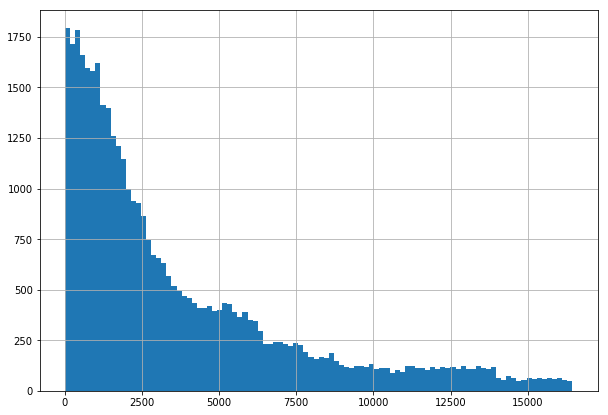

In [390]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

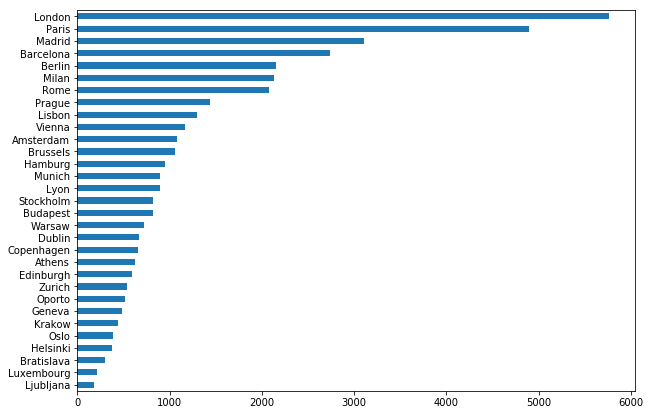

In [391]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

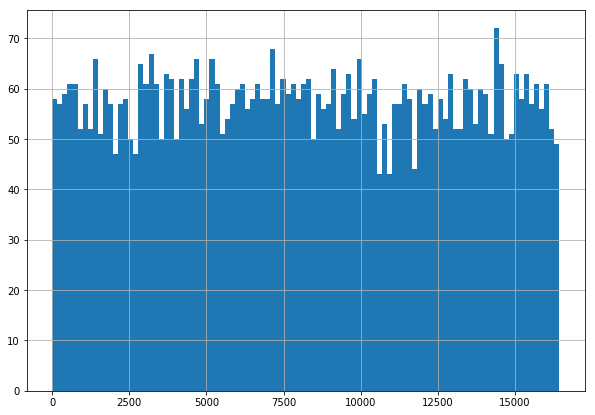

In [392]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

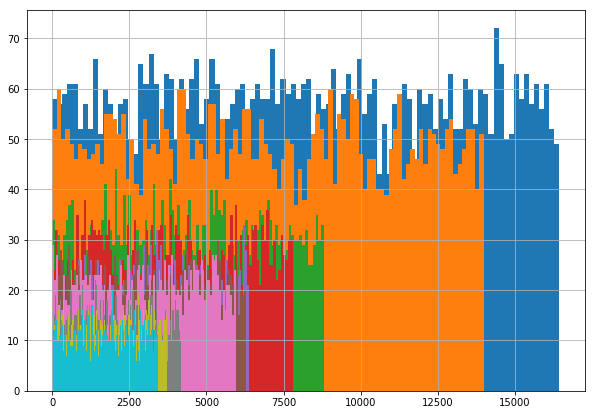

In [393]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


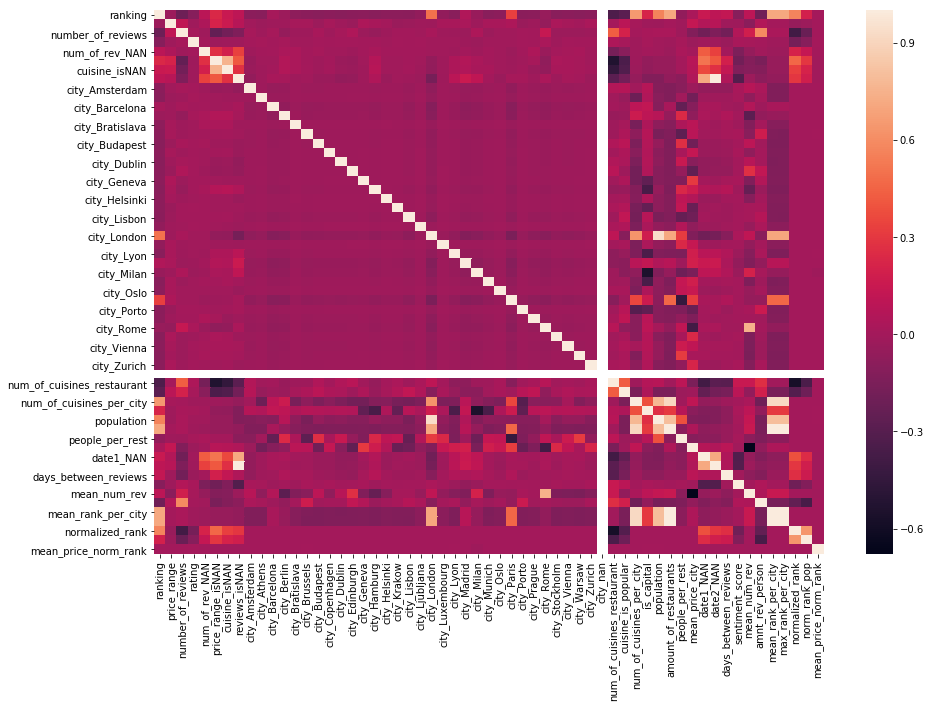

In [438]:
# Корреляция
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [560]:
# Удалим ненужные столбики
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [561]:
object_columns = [s for s in data.columns if data[s].dtypes == 'datetime64[ns]']
data.drop(object_columns, axis = 1, inplace=True)

### Посмотрим распределение целевой переменной

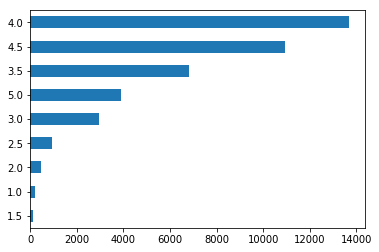

In [562]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

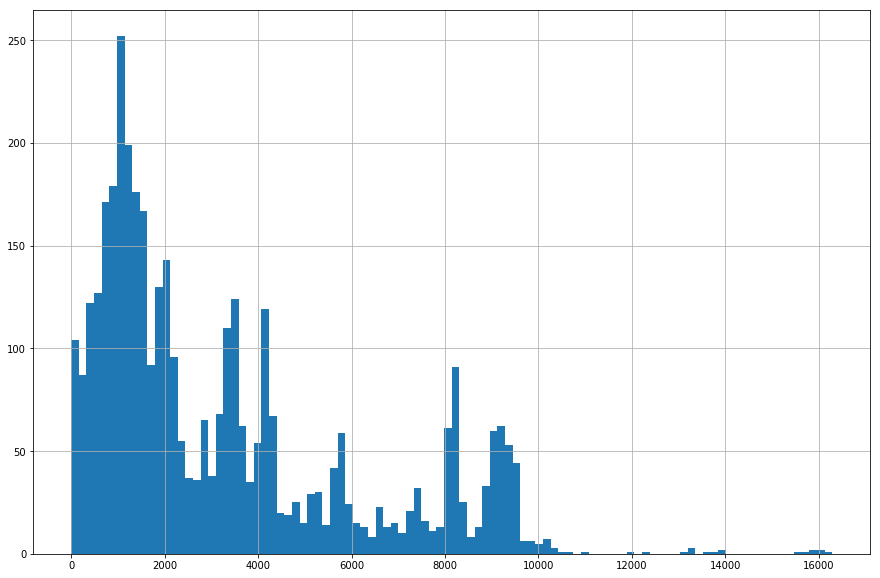

In [440]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

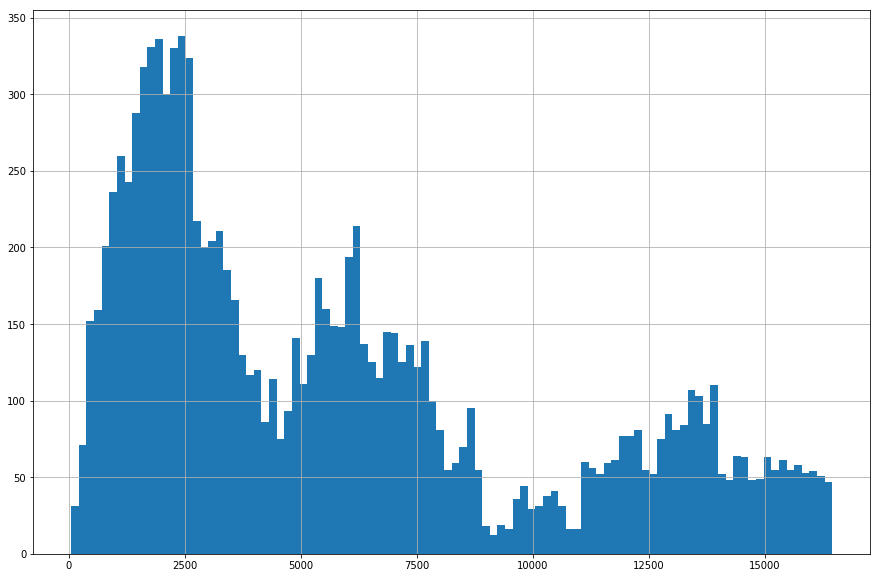

In [441]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

#### Запускаем и проверяем что получилось

In [563]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [564]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [565]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 59), (40000, 59), (40000, 58), (32000, 58), (8000, 58))

# Model 
Сам ML

In [476]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [477]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [468]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [478]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20366062499999998


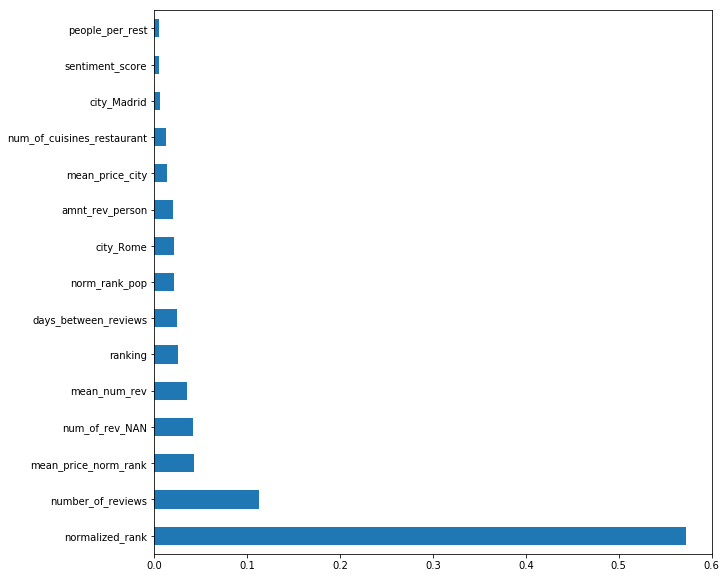

In [456]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [479]:
test_data.sample(10)

,ranking,price_range,number_of_reviews,rating,num_of_rev_NAN,price_range_isNAN,cuisine_isNAN,reviews_isNAN,city_Amsterdam,city_Athens,...,date2_NAN,days_between_reviews,sentiment_score,mean_num_rev,amnt_rev_person,mean_rank_per_city,max_rank_per_city,normalized_rank,norm_rank_pop,mean_price_norm_rank
17667,2438.0,1.5,15.0,0.0,0,1,1,0,0,0,...,0,129.000000,0,75.197479,0.015385,1237.482091,2464.0,0.487223,0.000500,3.046881
8192,15914.0,1.5,2.0,0.0,0,1,1,0,0,0,...,0,165.000000,0,137.968381,0.000225,8169.707354,16444.0,0.470949,0.000053,3.038489
35177,6953.0,1.5,17.0,0.0,0,1,1,0,0,0,...,0,101.000000,1,99.911888,0.005205,4388.516391,8809.0,0.291121,0.000089,5.008361
8045,3291.0,1.0,46.0,0.0,0,0,0,0,0,0,...,0,16.000000,1,137.968381,0.005164,8169.707354,16444.0,-0.296686,-0.000033,-4.823193
30588,3288.0,1.5,248.0,0.0,0,0,0,0,0,0,...,0,99.000000,2,135.683096,0.151589,3879.422680,7796.0,-0.075862,-0.000046,-18.825281
14996,1068.0,1.0,181.0,0.0,0,0,0,0,0,0,...,0,125.000000,0,127.830078,0.357708,1867.330298,3717.0,-0.215047,-0.000425,-6.561586
44661,680.0,1.5,9.0,0.0,0,1,1,1,0,1,...,1,133.118531,0,93.987517,0.013554,880.213918,1787.0,-0.112039,-0.000169,-12.491034
39378,1261.0,1.0,46.0,0.0,0,0,0,0,1,0,...,0,78.000000,0,148.744436,0.053488,1591.589650,3254.0,-0.101595,-0.000118,-14.133197
41044,384.0,1.0,52.0,0.0,0,0,0,0,0,0,...,0,16.000000,1,63.772188,0.014270,3255.417745,6372.0,-0.450631,-0.000124,-3.176080
16728,430.0,1.5,195.0,0.0,0,0,0,0,0,0,...,0,7.000000,1,158.680214,0.111301,1219.061704,2440.0,-0.323386,-0.000185,-4.340096


In [483]:
test_data = test_data.drop(['rating'], axis=1)

KeyError: "['rating'] not found in axis"

In [ ]:
sample_submission

In [ ]:
predict_submission = model.predict(test_data)

In [ ]:
predict_submission

In [ ]:
sample_submission['rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
